In [1]:
import community as community_louvain
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import networkx as nx
import pandas as pd


from matplotlib.patches import RegularPolygon, Patch
from matplotlib.lines import Line2D
from IPython.display import display, HTML 

In [2]:
# Edits jupyter notebooks to fit to screen width
display(HTML("<style>.container { width:100% !important; }</style>"))

# Changes a pandas global option so that all columns of a dataframe are displayed
pd.set_option('display.max_columns', None)

# pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.reset_option('display.float_format')

In [3]:
# Define the file path
file_path = 'FAF5.5.1.csv' # Update to your filepath

# Define the chunk size
chunk_size = 100000  # Adjust this value according to your needs

# Read the CSV file in chunks
chunks = pd.read_csv(file_path, chunksize=chunk_size)

# Concatenate the chunks into a single DataFrame
FAF_df = pd.concat(chunks)
FAF_df

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  \
0            NaN        11        11      NaN        NaN         1   
1            NaN        11        19      NaN        NaN         1   
2            NaN        11       129      NaN        NaN         1   
3            NaN        11       131      NaN        NaN         1   
4            NaN        11       139      NaN        NaN         1   
...          ...       ...       ...      ...        ...       ...   
2503347      NaN       559       171    808.0        NaN         1   
2503348      NaN       559       279    808.0        NaN         7   
2503349      NaN       559       451    808.0        NaN         2   
2503350      NaN       559       512    808.0        NaN         1   
2503351      NaN       560       151    808.0        NaN         7   

         fr_outmode  sctg2  trade_type  dist_band   tons_2017   tons_2018  \
0               NaN      1           1          1   51.010231   51.863434   
1               NaN      1           1          2  385.622345  392.072310   
2               NaN      1           1          3    1.360447    1.383202   
3               NaN      1           1          2   12.489625   12.698528   
4               NaN      1           1          2    5.134423    5.220302   
...             ...    ...         ...        ...         ...         ...   
2503347         4.0     43           3          2    0.000000    0.003501   
2503348         7.0     43           3          3    7.701563    0.000000   
2503349         3.0     43           3          6    0.000000    0.000000   
2503350         3.0     43           3          6    0.000412    0.000000   
2503351         7.0     43           3          8    5.917516    0.000000   

          tons_2019   tons_2020   tons_2021   tons_2022   tons_2023  \
0         54.012407   54.395645   56.117256   56.472318   59.925682   
1        408.317910  411.215079  424.229954  426.914113  443.496800   
2          1.440515    1.450736    1.496652    1.506121    1.479413   
3         13.224694   13.318528   13.740057   13.826992   13.723660   
4          5.436606    5.475181    5.648469    5.684208    5.784632   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    0.000000    0.000000    0.000000    0.000000    6.435162   
2503349    0.000000    0.000000    0.000000    0.000201    0.000000   
2503350    0.000000    0.000000    0.000000    0.001905    0.000502   
2503351    0.000000    0.000000    0.000000    0.000000    6.089231   

          tons_2025   tons_2030   tons_2035   tons_2040   tons_2045  \
0         70.330154   85.844765  102.206970  125.107510  154.243420   
1        500.276920  584.450440  662.015810  780.976560  940.071110   
2          1.495874    1.639743    1.733747    1.962994    2.306109   
3         14.873157   17.604208   18.407513   19.798471   22.457041   
4          6.364650    7.631062    8.063235    8.768422   10.056874   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    6.818995    7.759441    8.751489    9.929896   11.329823   
2503349    0.000000    0.000000    0.000000    0.000000    0.000000   
2503350    0.000543    0.000655    0.000768    0.000904    0.001069   
2503351    6.449642    7.423243    8.432725    9.628349   11.045329   

           tons_2050  value_2017  value_2018  value_2019  value_2020  \
0         182.801270   67.465919   68.594362   71.436584   71.943453   
1        1085.843000  510.022522  518.553218  540.039582  543.871367   
2           2.596105    1.799322    1.829418    1.905220    1.918738   
3          24.375181   16.518726   16.795020   17.490925   17.615030   
4          10.985498    6.790767    6.904350    7.190433    7.241452   
...              ...         ...         ...         ...         ...   
2503347     0.000000    0.000000 

In [4]:
# Get unique values from 'dms_orig' and 'dms_dest' columns
unique_orig_values = set(FAF_df['dms_orig'].unique())
unique_dest_values = set(FAF_df['dms_dest'].unique())

# Check if the unique values are the same
if unique_orig_values == unique_dest_values:
    print("The unique values in 'dms_orig' are the same as in 'dms_dest'")
else:
    print("The unique values in 'dms_orig' are not the same as in 'dms_dest'")

The unique values in 'dms_orig' are the same as in 'dms_dest'


In [5]:
Faf_region_names = {11 : 'Birmingham-Hoover-Talladega, AL CFS Area',
                    12 : 'Mobile-Daphne-Fairhope, AL CFS Area',
                    19 : 'Remainder of Alabama',
                    20 : 'Alaska',
                    41 : 'Phoenix-Mesa-Scottsdale, AZ CFS Area',
                    42 : 'Tucson-Nogales, AZ CFS Area',
                    49 : 'Remainder of Arizona',
                    50 : 'Arkansas',
                    61 : 'Los Angeles-Long Beach, CA CFS Area',
                    62 : 'Sacramento-Roseville, CA CFS Area', 
                    63 : 'San Diego-Carlsbad, CA CFS Area',
                    64 : 'San Jose-San Francisco-Oakland, CA CFS Area',
                    65 : 'Fresno-Madera, CA CFS Area',
                    69 : 'Remainder of California',
                    81 : 'Denver-Aurora, CO CFS Area',
                    89 : 'Remainder of Colorado',
                    91 : 'Hartford-West Hartford-East Hartford, CT CFS Area',
                    92 : 'New York-Newark, NY-NJ-CT-PA CFS Area (CT Part)',
                    99 : 'Remainder of Connecticut',
                    
                    101 : 'Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (DE Part)',
                    109 : 'Remainder of Delaware ',
                    111 : 'Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (DC Part)',
                    121 : 'Jacksonville-St. Marys-Palatka, FL-GA CFS Area (FL Part)',
                    122 : 'Miami-Fort Lauderdale-Port St. Lucie, FL CFS Area',
                    123 : 'Orlando-Deltona-Daytona Beach, FL CFS Area',
                    124 : 'Tampa-St. Petersburg-Clearwater, FL CFS Area',
                    129 : 'Remainder of Florida',
                    131 : 'Atlanta-Athens-Clarke County-Sandy Springs, GA CFS Area',
                    132 : 'Savannah-Hinesville-Statesboro, GA CFS Area',
                    139 : 'Remainder of Georgia',
                    151 : 'Urban Honolulu, HI CFS Area',
                    159 : 'Remainder of Hawaii',
                    160 : 'Idaho',
                    171 : 'Chicago-Naperville, IL-IN-WI CFS Area (IL Part)',
                    172 : 'St. Louis-St. Charles-Farmington, MO-IL CFS Area (IL Part)',
                    179 : 'Remainder of Illinois',
                    181 : 'Chicago-Naperville, IL-IN-WI CFS Area (IN Part)',
                    182 : 'Indianapolis-Carmel-Muncie, IN CFS Area',
                    183 : 'Fort Wayne-Huntington-Auburn, IN CFS Area',
                    189 : 'Remainder of Indiana',
                    190 : 'Iowa',
                    
                    201 : 'Kansas City-Overland Park-Kansas City, MO-KS CFS Area (KS Part)',
                    202 : 'Wichita-Arkansas City-Winfield, KS CFS Area',
                    209 : 'Remainder of Kansas',
                    211 : 'Cincinnati-Wilmington-Maysville, OH-KY-IN CFS Area (KY Part)',
                    212 : 'Louisville/Jefferson County-Elizabethtown-Madison, KY-IN CFS Area (KY Part)',
                    219 : 'Remainder of Kentucky',
                    221 : 'Baton Rouge, LA CFS Area',
                    222 : 'Lake Charles-Jennings, LA CFS Area',
                    223 : 'New Orleans-Metairie-Hammond, LA-MS CFS Area (LA Part)',
                    229 : 'Remainder of Louisiana',
                    230 : 'Maine',
                    241 : 'Baltimore-Columbia-Towson, MD CFS Area',
                    242 : 'Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (MD Part)',
                    249 : 'Remainder of Maryland',
                    251 : 'Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (MA Part)',
                    259 : 'Remainder of Massachusetts',
                    261 : 'Detroit-Warren-Ann Arbor, MI CFS Area',
                    262 : 'Grand Rapids-Wyoming-Muskegon, MI CFS Area',
                    269 : 'Remainder of Michigan', 
                    271 : 'Minneapolis-St. Paul, MN-WI CFS Area (MN Part)',
                    279 : 'Remainder of Minnesota',
                    280 : 'Mississippi',
                    291 : 'Kansas City-Overland Park-Kansas City, MO-KS CFS Area (MO Part)',
                    292 : 'St. Louis-St. Charles-Farmington, MO-IL CFS Area (MO Part)',
                    299 : 'Remainder of Missouri',
                    
                    300 : 'Montana',
                    311 : 'Omaha-Council Bluffs-Fremont, NE-IA CFS Area (NE Part)',
                    319 : 'Remainder of Nebraska',
                    321 : 'Las Vegas-Henderson, NV-AZ CFS Area (NV Part)',
                    329 : 'Remainder of Nevada',
                    331 : 'Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (NH Part)',
                    339 : 'Remainder of New Hampshire',
                    341 : 'New York-Newark, NY-NJ-CT-PA CFS Area (NJ Part)',
                    342 : 'Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (NJ Part)',
                    350 : 'New Mexico',
                    361 : 'Albany-Schenectady, NY CFS Area',
                    362 : 'Buffalo-Cheektowaga, NY CFS Area',
                    363 : 'New York-Newark, NY-NJ-CT-PA CFS Area (NY Part)',
                    364 : 'Rochester-Batavia-Seneca Falls, NY CFS Area',
                    369 : 'Remainder of New York',
                    371 : 'Charlotte-Concord, NC-SC CFS Area (NC Part)',
                    372 : 'Greensboro-Winston-Salem-High Point, NC CFS Area',
                    373 : 'Raleigh-Durham-Chapel Hill, NC CFS Area',
                    379 : 'Remainder of North Carolina',
                    380 : 'North Dakota',
                    391 : 'Cincinnati-Wilmington-Maysville, OH-KY-IN CFS Area (OH Part)',
                    392 : 'Cleveland-Akron-Canton, OH CFS Area',
                    393 : 'Columbus-Marion-Zanesville, OH CFS Area',
                    394 : 'Dayton-Springfield-Sidney, OH CFS Area',
                    399 : 'Remainder of Ohio',
                    
                    401 : 'Oklahoma City-Shawnee, OK CFS Area',
                    402 : 'Tulsa-Muskogee-Bartlesville, OK CFS Area',
                    409 : 'Remainder of Oklahoma',
                    411 : 'Portland-Vancouver-Salem, OR-WA CFS Area (OR Part)',
                    419 : 'Remainder of Oregon',
                    421 : 'Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (PA Part)',
                    422 : 'Pittsburgh-New Castle-Weirton, PA-OH-WV CFS Area (PA Part)',
                    423 : 'New York-Newark, NY-NJ-CT-PA CFS Area (PA Part)',
                    429 : 'Remainder of Pennsylvania',
                    441 : 'Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (RI Part)',
                    451 : 'Charleston-North Charleston, SC CFS Area',
                    452 : 'Greenville-Spartanburg-Anderson, SC CFS Area',
                    459 : 'Remainder of South Carolina',
                    460 : 'South Dakota',
                    471 : 'Memphis-Forrest City, TN-MS-AR CFS Area (TN Part)',
                    472 : 'Nashville-Davidson-Murfreesboro, TN CFS Area',
                    473 : 'Knoxville-Morristown-Sevierville, TN CFS Area',
                    479 : 'Remainder of Tennessee',
                    481 : 'Austin-Round Rock, TX CFS Area',
                    482 : 'Beaumont-Port Arthur, TX CFS Area',
                    483 : 'Corpus Christi-Kingsville-Alice, TX CFS Area',
                    484 : 'Dallas-Fort Worth, TX-OK CFS Area (TX Part)',
                    485 : 'El Paso-Las Cruces, TX-NM CFS Area (TX Part)',
                    486 : 'Houston-The Woodlands, TX CFS Area',
                    487 : 'Laredo, TX CFS Area',
                    488 : 'San Antonio-New Braunfels, TX CFS Area',
                    489 : 'Remainder of Texas',
                    491 : 'Salt Lake City-Provo-Orem, UT CFS Area',
                    499 : 'Remainder of Utah',
                    
                    500 : 'Vermont',
                    511 : 'Richmond, VA CFS Area',
                    512 : 'Virginia Beach-Norfolk, VA-NC CFS Area (VA Part)',
                    513 : 'Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (VA Part)',
                    519 : 'Remainder of Virginia',
                    531 : 'Seattle-Tacoma, WA CFS Area',
                    532 : 'Portland-Vancouver-Salem, OR-WA CFS Area (WA Part)',
                    539 : 'Remainder of Washington',
                    540 : 'West Virginia',
                    551 : 'Milwaukee-Racine-Waukesha, WI CFS Area',
                    559 : 'Remainder of Wisconsin',
                    560 : 'Wyoming'} 

In [6]:
FAF_df["Commodity_Origin_Location"] = FAF_df["dms_orig"].map(Faf_region_names, na_action=None)
FAF_df

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  \
0            NaN        11        11      NaN        NaN         1   
1            NaN        11        19      NaN        NaN         1   
2            NaN        11       129      NaN        NaN         1   
3            NaN        11       131      NaN        NaN         1   
4            NaN        11       139      NaN        NaN         1   
...          ...       ...       ...      ...        ...       ...   
2503347      NaN       559       171    808.0        NaN         1   
2503348      NaN       559       279    808.0        NaN         7   
2503349      NaN       559       451    808.0        NaN         2   
2503350      NaN       559       512    808.0        NaN         1   
2503351      NaN       560       151    808.0        NaN         7   

         fr_outmode  sctg2  trade_type  dist_band   tons_2017   tons_2018  \
0               NaN      1           1          1   51.010231   51.863434   
1               NaN      1           1          2  385.622345  392.072310   
2               NaN      1           1          3    1.360447    1.383202   
3               NaN      1           1          2   12.489625   12.698528   
4               NaN      1           1          2    5.134423    5.220302   
...             ...    ...         ...        ...         ...         ...   
2503347         4.0     43           3          2    0.000000    0.003501   
2503348         7.0     43           3          3    7.701563    0.000000   
2503349         3.0     43           3          6    0.000000    0.000000   
2503350         3.0     43           3          6    0.000412    0.000000   
2503351         7.0     43           3          8    5.917516    0.000000   

          tons_2019   tons_2020   tons_2021   tons_2022   tons_2023  \
0         54.012407   54.395645   56.117256   56.472318   59.925682   
1        408.317910  411.215079  424.229954  426.914113  443.496800   
2          1.440515    1.450736    1.496652    1.506121    1.479413   
3         13.224694   13.318528   13.740057   13.826992   13.723660   
4          5.436606    5.475181    5.648469    5.684208    5.784632   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    0.000000    0.000000    0.000000    0.000000    6.435162   
2503349    0.000000    0.000000    0.000000    0.000201    0.000000   
2503350    0.000000    0.000000    0.000000    0.001905    0.000502   
2503351    0.000000    0.000000    0.000000    0.000000    6.089231   

          tons_2025   tons_2030   tons_2035   tons_2040   tons_2045  \
0         70.330154   85.844765  102.206970  125.107510  154.243420   
1        500.276920  584.450440  662.015810  780.976560  940.071110   
2          1.495874    1.639743    1.733747    1.962994    2.306109   
3         14.873157   17.604208   18.407513   19.798471   22.457041   
4          6.364650    7.631062    8.063235    8.768422   10.056874   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    6.818995    7.759441    8.751489    9.929896   11.329823   
2503349    0.000000    0.000000    0.000000    0.000000    0.000000   
2503350    0.000543    0.000655    0.000768    0.000904    0.001069   
2503351    6.449642    7.423243    8.432725    9.628349   11.045329   

           tons_2050  value_2017  value_2018  value_2019  value_2020  \
0         182.801270   67.465919   68.594362   71.436584   71.943453   
1        1085.843000  510.022522  518.553218  540.039582  543.871367   
2           2.596105    1.799322    1.829418    1.905220    1.918738   
3          24.375181   16.518726   16.795020   17.490925   17.615030   
4          10.985498    6.790767    6.904350    7.190433    7.241452   
...              ...         ...         ...         ...         ...   
2503347     0.000000    0.000000 

In [7]:
FAF_df["Commodity_Destination_Location"] = FAF_df["dms_dest"].map(Faf_region_names, na_action=None)
FAF_df

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  \
0            NaN        11        11      NaN        NaN         1   
1            NaN        11        19      NaN        NaN         1   
2            NaN        11       129      NaN        NaN         1   
3            NaN        11       131      NaN        NaN         1   
4            NaN        11       139      NaN        NaN         1   
...          ...       ...       ...      ...        ...       ...   
2503347      NaN       559       171    808.0        NaN         1   
2503348      NaN       559       279    808.0        NaN         7   
2503349      NaN       559       451    808.0        NaN         2   
2503350      NaN       559       512    808.0        NaN         1   
2503351      NaN       560       151    808.0        NaN         7   

         fr_outmode  sctg2  trade_type  dist_band   tons_2017   tons_2018  \
0               NaN      1           1          1   51.010231   51.863434   
1               NaN      1           1          2  385.622345  392.072310   
2               NaN      1           1          3    1.360447    1.383202   
3               NaN      1           1          2   12.489625   12.698528   
4               NaN      1           1          2    5.134423    5.220302   
...             ...    ...         ...        ...         ...         ...   
2503347         4.0     43           3          2    0.000000    0.003501   
2503348         7.0     43           3          3    7.701563    0.000000   
2503349         3.0     43           3          6    0.000000    0.000000   
2503350         3.0     43           3          6    0.000412    0.000000   
2503351         7.0     43           3          8    5.917516    0.000000   

          tons_2019   tons_2020   tons_2021   tons_2022   tons_2023  \
0         54.012407   54.395645   56.117256   56.472318   59.925682   
1        408.317910  411.215079  424.229954  426.914113  443.496800   
2          1.440515    1.450736    1.496652    1.506121    1.479413   
3         13.224694   13.318528   13.740057   13.826992   13.723660   
4          5.436606    5.475181    5.648469    5.684208    5.784632   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    0.000000    0.000000    0.000000    0.000000    6.435162   
2503349    0.000000    0.000000    0.000000    0.000201    0.000000   
2503350    0.000000    0.000000    0.000000    0.001905    0.000502   
2503351    0.000000    0.000000    0.000000    0.000000    6.089231   

          tons_2025   tons_2030   tons_2035   tons_2040   tons_2045  \
0         70.330154   85.844765  102.206970  125.107510  154.243420   
1        500.276920  584.450440  662.015810  780.976560  940.071110   
2          1.495874    1.639743    1.733747    1.962994    2.306109   
3         14.873157   17.604208   18.407513   19.798471   22.457041   
4          6.364650    7.631062    8.063235    8.768422   10.056874   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    6.818995    7.759441    8.751489    9.929896   11.329823   
2503349    0.000000    0.000000    0.000000    0.000000    0.000000   
2503350    0.000543    0.000655    0.000768    0.000904    0.001069   
2503351    6.449642    7.423243    8.432725    9.628349   11.045329   

           tons_2050  value_2017  value_2018  value_2019  value_2020  \
0         182.801270   67.465919   68.594362   71.436584   71.943453   
1        1085.843000  510.022522  518.553218  540.039582  543.871367   
2           2.596105    1.799322    1.829418    1.905220    1.918738   
3          24.375181   16.518726   16.795020   17.490925   17.615030   
4          10.985498    6.790767    6.904350    7.190433    7.241452   
...              ...         ...         ...         ...         ...   
2503347     0.000000    0.000000 

In [8]:
FAF_df['Self_Flow'] = np.where(FAF_df['Commodity_Origin_Location'] == FAF_df['Commodity_Destination_Location'], 'Yes', 'No')
FAF_df

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  \
0            NaN        11        11      NaN        NaN         1   
1            NaN        11        19      NaN        NaN         1   
2            NaN        11       129      NaN        NaN         1   
3            NaN        11       131      NaN        NaN         1   
4            NaN        11       139      NaN        NaN         1   
...          ...       ...       ...      ...        ...       ...   
2503347      NaN       559       171    808.0        NaN         1   
2503348      NaN       559       279    808.0        NaN         7   
2503349      NaN       559       451    808.0        NaN         2   
2503350      NaN       559       512    808.0        NaN         1   
2503351      NaN       560       151    808.0        NaN         7   

         fr_outmode  sctg2  trade_type  dist_band   tons_2017   tons_2018  \
0               NaN      1           1          1   51.010231   51.863434   
1               NaN      1           1          2  385.622345  392.072310   
2               NaN      1           1          3    1.360447    1.383202   
3               NaN      1           1          2   12.489625   12.698528   
4               NaN      1           1          2    5.134423    5.220302   
...             ...    ...         ...        ...         ...         ...   
2503347         4.0     43           3          2    0.000000    0.003501   
2503348         7.0     43           3          3    7.701563    0.000000   
2503349         3.0     43           3          6    0.000000    0.000000   
2503350         3.0     43           3          6    0.000412    0.000000   
2503351         7.0     43           3          8    5.917516    0.000000   

          tons_2019   tons_2020   tons_2021   tons_2022   tons_2023  \
0         54.012407   54.395645   56.117256   56.472318   59.925682   
1        408.317910  411.215079  424.229954  426.914113  443.496800   
2          1.440515    1.450736    1.496652    1.506121    1.479413   
3         13.224694   13.318528   13.740057   13.826992   13.723660   
4          5.436606    5.475181    5.648469    5.684208    5.784632   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    0.000000    0.000000    0.000000    0.000000    6.435162   
2503349    0.000000    0.000000    0.000000    0.000201    0.000000   
2503350    0.000000    0.000000    0.000000    0.001905    0.000502   
2503351    0.000000    0.000000    0.000000    0.000000    6.089231   

          tons_2025   tons_2030   tons_2035   tons_2040   tons_2045  \
0         70.330154   85.844765  102.206970  125.107510  154.243420   
1        500.276920  584.450440  662.015810  780.976560  940.071110   
2          1.495874    1.639743    1.733747    1.962994    2.306109   
3         14.873157   17.604208   18.407513   19.798471   22.457041   
4          6.364650    7.631062    8.063235    8.768422   10.056874   
...             ...         ...         ...         ...         ...   
2503347    0.000000    0.000000    0.000000    0.000000    0.000000   
2503348    6.818995    7.759441    8.751489    9.929896   11.329823   
2503349    0.000000    0.000000    0.000000    0.000000    0.000000   
2503350    0.000543    0.000655    0.000768    0.000904    0.001069   
2503351    6.449642    7.423243    8.432725    9.628349   11.045329   

           tons_2050  value_2017  value_2018  value_2019  value_2020  \
0         182.801270   67.465919   68.594362   71.436584   71.943453   
1        1085.843000  510.022522  518.553218  540.039582  543.871367   
2           2.596105    1.799322    1.829418    1.905220    1.918738   
3          24.375181   16.518726   16.795020   17.490925   17.615030   
4          10.985498    6.790767    6.904350    7.190433    7.241452   
...              ...         ...         ...         ...         ...   
2503347     0.000000    0.000000 

---------------------------------

In [9]:
FAF_IMW =  pd.read_csv('FAF_IMW.csv') # update to your file path 
FAF_IMW

OID_  OBJECTID                                         CFS17_NAME  GEOID  \
0     23        23                        Denver-Aurora, CO  CFS Area   8093   
1     25        25      El Paso-Las Cruces, TX-NM  CFS Area (TX Part)  48229   
2     27        27                        Fresno-Madera, CA  CFS Area   6019   
3     40        40     Las Vegas-Henderson, NV-AZ  CFS Area (NV Part)  32003   
4     41        41               Los Angeles-Long Beach, CA  CFS Area   6111   
5     60        60              Phoenix-Mesa-Scottsdale, AZ  CFS Area   4021   
6     62        62  Portland-Vancouver-Salem, OR-WA  CFS Area (OR ...  41005   
7     63        63  Portland-Vancouver-Salem, OR-WA  CFS Area (WA ...  53015   
8     67        67                               Remainder of Arizona   4027   
9     69        69                            Remainder of California   6091   
10    70        70                              Remainder of Colorado   8109   
11    76        76                                 Remainder of Idaho  16051   
12    90        90                               Remainder of Montana  30065   
13    92        92                                Remainder of Nevada  32001   
14    94        94                            Remainder of New Mexico  35011   
15   100       100                                Remainder of Oregon  41063   
16   106       106                                  Remainder of Utah  49033   
17   109       109                            Remainder of Washington  53069   
18   112       112                               Remainder of Wyoming  56023   
19   115       115                 Sacramento-Roseville, CA  CFS Area   6067   
20   116       116            Salt Lake City-Provo-Orem, UT  CFS Area  49011   
21   118       118                   San Diego-Carlsbad, CA  CFS Area   6073   
22   119       119       San Jose-San Francisco-Oakland, CA  CFS Area   6097   
23   121       121                       Seattle-Tacoma, WA  CFS Area  53041   
24   125       125                       Tucson-Nogales, AZ  CFS Area   4019   

           ALAND     AWATER   INTPTLAT    INTPTLON  \
0   5.682181e+09   43520913  39.118914 -105.717648   
1   1.183761e+10    2189943  31.450868 -105.377549   
2   1.543141e+10  137339029  36.761006 -119.655019   
3   2.043928e+10  438376844  36.214258 -115.013812   
4   4.773303e+09  946030569  34.358742 -119.133143   
5   1.389747e+10   22332471  32.918538 -111.366387   
6   4.845049e+09   31834351  45.160493 -122.195127   
7   2.953721e+09   67320045  46.196785 -122.678460   
8   1.428127e+10   13171316  32.773942 -113.910905   
9   2.468695e+09   23299110  39.576925 -120.521993   
10  8.206548e+09    4454510  38.031651 -106.234666   
11  2.832617e+09   31168379  43.796965 -112.318588   
12  4.840578e+09    7118682  46.505281 -108.439763   
13  1.277013e+10  242405502  39.537710 -118.264165   
14  6.016762e+09   29147345  34.359273 -104.368696   
15  8.147837e+09   14191789  45.593753 -117.185580   
16  2.664701e+09  149106532  41.627598 -111.240227   
17  6.809568e+08   61588406  46.294638 -123.424458   
18  1.055507e+10   49947392  42.229993 -110.682961   
19  2.499040e+09   76217822  38.450016 -121.340441   
20  7.745008e+08  870693260  41.037559 -112.201943   
21  1.089879e+10  822557348  33.023604 -116.776117   
22  4.081451e+09  497495823  38.525182 -122.926109   
23  6.223151e+09   86954130  46.580071 -122.377444   
24  2.379479e+10    5259325  32.128523 -111.783027   

                                           CFS07_NAME  \
0                  Denver-Aurora-Boulder, CO CFS Area   
1                                  Remainder of Texas   
2                             Remainder of California   
3             Las Vegas-Paradise-Pahrump, NV CFS Area   
4       Los Angeles-Long Beach-Riverside, CA CFS Area   
5                Phoenix-Mesa-Scottsdale, AZ CFS Area   
6   Portland-Vancouver-Beaverton, OR-WA CFS Area (...   
7                             Remainder of Washington   
8    

---------------------

In [10]:
# Filter the FAF_df DataFrame
IMW_Filtered_FAF_df = FAF_df[
    (FAF_df['dms_orig'].isin(FAF_IMW['FAF_Zone'])) &
    (FAF_df['dms_dest'].isin(FAF_IMW['FAF_Zone'])) ] # & (FAF_df['trade_type'] == 1)]

IMW_Filtered_FAF_df

# IMW_Filtered_FAF_df.to_csv('IMW_Filtered_FAF_Data.csv', index=False)

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  \
36           NaN        41        61      NaN        NaN         1   
37           NaN        41        69      NaN        NaN         1   
39           NaN        42        61      NaN        NaN         5   
40           NaN        42        62      NaN        NaN         5   
41           NaN        42        64      NaN        NaN         5   
...          ...       ...       ...      ...        ...       ...   
2503297      NaN       532        64    808.0        NaN         4   
2503306      NaN       532       531    808.0        NaN         1   
2503307      NaN       539        61    808.0        NaN         4   
2503308      NaN       539        64    808.0        NaN         4   
2503317      NaN       539       531    808.0        NaN         1   

         fr_outmode  sctg2  trade_type  dist_band  tons_2017  tons_2018  \
36              NaN      1           1          3  60.903824  61.657617   
37              NaN      1           1          3  24.143476  24.442294   
39              NaN      1           1          4   0.000050   0.000051   
40              NaN      1           1          5   0.000050   0.000051   
41              NaN      1           1          5   0.000050   0.000051   
...             ...    ...         ...        ...        ...        ...   
2503297         4.0     43           3          4   0.000000   0.004437   
2503306         3.0     43           3          2   1.721190   0.037752   
2503307         4.0     43           3          5   0.000000   0.000653   
2503308         4.0     43           3          4   0.000000   0.013966   
2503317         3.0     43           3          2   5.454966   0.118818   

         tons_2019  tons_2020  tons_2021  tons_2022  tons_2023  tons_2025  \
36       60.398447  56.226942  62.244575  62.325348  64.444855  58.764088   
37       23.943135  22.289468  24.674976  24.706996  24.322107  21.096422   
39        0.000050   0.000046   0.000051   0.000051   0.000058   0.000058   
40        0.000050   0.000046   0.000051   0.000051   0.000057   0.000051   
41        0.000050   0.000046   0.000051   0.000051   0.000057   0.000054   
...            ...        ...        ...        ...        ...        ...   
2503297   0.000000   0.002844   0.005456   0.000000   0.000000   0.000000   
2503306   0.099148   0.048490   0.000000   0.003055   1.666126   1.771613   
2503307   0.000739   0.000000   0.000000   0.001851   0.000000   0.000000   
2503308   0.000000   0.008950   0.017170   0.000000   0.000000   0.000000   
2503317   0.312050   0.152614   0.001221   0.009614   5.280451   5.614773   

         tons_2030  tons_2035  tons_2040  tons_2045  tons_2050  value_2017  \
36       60.490234  65.057915  71.838669  79.006943  84.521317  264.730042   
37       21.041481  22.474911  24.593756  26.732998  28.261583  104.944206   
39        0.000069   0.000085   0.000107   0.000135   0.000163    0.000261   
40        0.000058   0.000071   0.000088   0.000109   0.000129    0.000121   
41        0.000063   0.000079   0.000099   0.000125   0.000150    0.001241   
...            ...        ...        ...        ...        ...         ...   
2503297   0.000000   0.000000   0.000000   0.000000   0.000000    0.000000   
2503306   2.074638   2.377258   2.737081   3.166025   3.678769    6.464852   
2503307   0.000000   0.000000   0.000000   0.000000   0.000000    0.000000   
2503308   0.000000   0.000000   0.000000   0.000000   0.000000    0.000000   
2503317   6.575148   7.534241   8.674628  10.034080  11.659121   20.489050   

         value_2018  value_2019  value_2020  value_2021  value_2022  \
36       268.006546  262.533326  244.401086  270.557870  270.908966   
37       106.243077  104.073384   96.885407  107.254472  107.393653   
39         0.000264    0.000259    0.000241    0.000267    0.000267   
40         0.000122    0.000120    0.000112    0.000124    0.000124   
41         0.001256    0.001231    0.001146    0.0

In [11]:
# Merge the dataframes on the condition
IMW_Filtered_FAF_df = IMW_Filtered_FAF_df.merge(FAF_IMW, left_on='dms_dest', right_on='FAF_Zone', how='left')

# Drop the 'FAF_Zone' column
IMW_Filtered_FAF_df 

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  fr_outmode  \
0           NaN        41        61      NaN        NaN         1         NaN   
1           NaN        41        69      NaN        NaN         1         NaN   
2           NaN        42        61      NaN        NaN         5         NaN   
3           NaN        42        62      NaN        NaN         5         NaN   
4           NaN        42        64      NaN        NaN         5         NaN   
...         ...       ...       ...      ...        ...       ...         ...   
146294      NaN       532        64    808.0        NaN         4         4.0   
146295      NaN       532       531    808.0        NaN         1         3.0   
146296      NaN       539        61    808.0        NaN         4         4.0   
146297      NaN       539        64    808.0        NaN         4         4.0   
146298      NaN       539       531    808.0        NaN         1         3.0   

        sctg2  trade_type  dist_band  tons_2017  tons_2018  tons_2019  \
0           1           1          3  60.903824  61.657617  60.398447   
1           1           1          3  24.143476  24.442294  23.943135   
2           1           1          4   0.000050   0.000051   0.000050   
3           1           1          5   0.000050   0.000051   0.000050   
4           1           1          5   0.000050   0.000051   0.000050   
...       ...         ...        ...        ...        ...        ...   
146294     43           3          4   0.000000   0.004437   0.000000   
146295     43           3          2   1.721190   0.037752   0.099148   
146296     43           3          5   0.000000   0.000653   0.000739   
146297     43           3          4   0.000000   0.013966   0.000000   
146298     43           3          2   5.454966   0.118818   0.312050   

        tons_2020  tons_2021  tons_2022  tons_2023  tons_2025  tons_2030  \
0       56.226942  62.244575  62.325348  64.444855  58.764088  60.490234   
1       22.289468  24.674976  24.706996  24.322107  21.096422  21.041481   
2        0.000046   0.000051   0.000051   0.000058   0.000058   0.000069   
3        0.000046   0.000051   0.000051   0.000057   0.000051   0.000058   
4        0.000046   0.000051   0.000051   0.000057   0.000054   0.000063   
...           ...        ...        ...        ...        ...        ...   
146294   0.002844   0.005456   0.000000   0.000000   0.000000   0.000000   
146295   0.048490   0.000000   0.003055   1.666126   1.771613   2.074638   
146296   0.000000   0.000000   0.001851   0.000000   0.000000   0.000000   
146297   0.008950   0.017170   0.000000   0.000000   0.000000   0.000000   
146298   0.152614   0.001221   0.009614   5.280451   5.614773   6.575148   

        tons_2035  tons_2040  tons_2045  tons_2050  value_2017  value_2018  \
0       65.057915  71.838669  79.006943  84.521317  264.730042  268.006546   
1       22.474911  24.593756  26.732998  28.261583  104.944206  106.243077   
2        0.000085   0.000107   0.000135   0.000163    0.000261    0.000264   
3        0.000071   0.000088   0.000109   0.000129    0.000121    0.000122   
4        0.000079   0.000099   0.000125   0.000150    0.001241    0.001256   
...           ...        ...        ...        ...         ...         ...   
146294   0.000000   0.000000   0.000000   0.000000    0.000000    0.016213   
146295   2.377258   2.737081   3.166025   3.678769    6.464852    0.043949   
146296   0.000000   0.000000   0.000000   0.000000    0.000000    0.002384   
146297   0.000000   0.000000   0.000000   0.000000    0.000000    0.051026   
146298   7.534241   8.674628  10.034080  11.659121   20.489050    0.138321   

        value_2019  value_2020  value_2021  value_2022  value_2023  \
0       262.533326  244.401086  270.557870  270.908966  280.121805   
1       104.073384   96.885407  107.254472  107.393653  105.720659   
2         0.000259    0.000241    0.000267    0.000267    0.000301   
3         0.000120    0.0001

In [12]:
filtered_df = IMW_Filtered_FAF_df[IMW_Filtered_FAF_df['sctg2'].isin([16, 17, 18])]
filtered_df

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  fr_outmode  \
5076        NaN        61        61      NaN        NaN         1         NaN   
5077        NaN        61        61      NaN        NaN         3         NaN   
5078        NaN        61        61      NaN        NaN         6         NaN   
5079        NaN        61        64      NaN        NaN         1         NaN   
5080        NaN        61        64      NaN        NaN         3         NaN   
...         ...       ...       ...      ...        ...       ...         ...   
102530      NaN       539       531    808.0        NaN         3         3.0   
102531      NaN       539       531    808.0        NaN         5         3.0   
102532      NaN       539       539    808.0        NaN         1         3.0   
102533      NaN       539       539    808.0        NaN         2         3.0   
102534      NaN       539       539    808.0        NaN         3         3.0   

        sctg2  trade_type  dist_band    tons_2017    tons_2018    tons_2019  \
5076       16           1          1    33.364449    31.274338    30.423613   
5077       16           1          1   756.646545   709.246537   689.953608   
5078       16           1          1  1261.200928  1182.193187  1150.035160   
5079       16           1          3     0.620747     0.581860     0.566033   
5080       16           1          3   463.747375   434.695991   422.871388   
...       ...         ...        ...          ...          ...          ...   
102530     18           3          1     0.526068     1.321596     0.566006   
102531     18           3          2     1.578204     3.964790     1.698020   
102532     18           3          1     0.000000     0.000000     0.512752   
102533     18           3          2     1.439534     0.000000     1.060931   
102534     18           3          1     3.445713     0.000000     1.573683   

          tons_2020    tons_2021   tons_2022    tons_2023   tons_2025  \
5076      28.290221    26.865776   25.055567    29.089926   24.665430   
5077     641.572047   609.268167  568.215834   659.708010  559.368230   
5078    1069.391338  1015.546272  947.119024  1099.620800  932.371640   
5079       0.526341     0.499839    0.466160     0.546635    0.459023   
5080     393.218412   373.419419  348.258514   408.379580  342.926850   
...             ...          ...         ...          ...         ...   
102530     0.477033     0.406349    1.849041     1.507414    1.609342   
102531     1.431099     1.219047    5.547125     4.522242    4.828026   
102532     0.872780     0.543941    0.153814     0.000000    0.000000   
102533     1.805863     1.125465    0.318255     4.124892    4.403808   
102534     2.678643     1.669407    0.472068     9.873469   10.541090   

         tons_2030   tons_2035   tons_2040   tons_2045   tons_2050  \
5076     21.388941   18.959936   17.621452   15.315696   13.781848   
5077    485.063260  429.977750  399.623320  347.332860  312.547880   
5078    808.517820  716.699710  666.104000  578.944700  520.964110   
5079      0.402545    0.359069    0.335578    0.291668    0.262458   
5080    300.732910  268.252960  250.703770  217.899320  196.076980   
...            ...         ...         ...         ...         ...   
102530    1.787185    1.955108    2.138880    2.340002    2.560125   
102531    5.361555    5.865326    6.416639    7.020007    7.680376   
102532    0.000000    0.000000    0.000000    0.000000    0.000000   
102533    4.890458    5.349964    5.852836    6.403189    7.005534   
102534   11.705952   12.805840   14.009530   15.326872   16.768663   

        value_2017  value_2018  value_2019  value_2020  value_2021  \
5076     10.527149    9.867677    9.599257    8.926129    8.476688   
5077    238.737076  223.781428  217.694124  202.428777  192.236258   
5078    397.934052  373.005534  362.859035  337.414300  320.425108   
5079      0.195858    0.183589    0.178595    0.166071    0.157709   
5080    146.321533

In [13]:
count_self_flows = IMW_Filtered_FAF_df['Self_Flow'].value_counts()
print(count_self_flows)

Self_Flow
No     132007
Yes     14292
Name: count, dtype: int64


In [14]:
FAF_IMW['FAF_Zone'].unique()

array([ 81, 485,  65, 321,  61,  41, 411, 532,  49,  69,  89, 160, 300,
       329, 350, 419, 499, 539, 560,  62, 491,  63,  64, 531,  42])

In [15]:
# domestic freight origin location
IMW_Filtered_FAF_df['dms_orig'].unique()

array([ 41,  42,  49,  61,  62,  63,  64,  65,  69,  81,  89, 160, 300,
       321, 329, 350, 411, 419, 485, 491, 499, 531, 532, 539, 560])

In [16]:
# Get unique values from 'dms_orig'
unique_orig_values = sorted(IMW_Filtered_FAF_df['dms_orig'].unique(), reverse=True)

# For each unique value, print the value and its associated columns
for orig in unique_orig_values:
    affiliated_row = IMW_Filtered_FAF_df[IMW_Filtered_FAF_df['dms_orig'] == orig].iloc[0]
    affiliated_origin = affiliated_row['Commodity_Origin_Location']
    affiliated_dest = affiliated_row['Commodity_Destination_Location']
    affiliated_lat = affiliated_row['INTPTLAT']
    affiliated_lon = affiliated_row['INTPTLON']
    
    # print(f"dms_orig: {orig}, FAF_Origin: {affiliated_origin}, FAF_Destination: {affiliated_dest}, INTPTLAT: {affiliated_lat}, INTPTLON: {affiliated_lon}")
    print(f"dms_orig: {orig}, FAF_Origin: {affiliated_origin}")
    print("----")


dms_orig: 560, FAF_Origin: Wyoming
----
dms_orig: 539, FAF_Origin: Remainder of Washington
----
dms_orig: 532, FAF_Origin: Portland-Vancouver-Salem, OR-WA CFS Area (WA Part)
----
dms_orig: 531, FAF_Origin: Seattle-Tacoma, WA CFS Area
----
dms_orig: 499, FAF_Origin: Remainder of Utah
----
dms_orig: 491, FAF_Origin: Salt Lake City-Provo-Orem, UT CFS Area
----
dms_orig: 485, FAF_Origin: El Paso-Las Cruces, TX-NM CFS Area (TX Part)
----
dms_orig: 419, FAF_Origin: Remainder of Oregon
----
dms_orig: 411, FAF_Origin: Portland-Vancouver-Salem, OR-WA CFS Area (OR Part)
----
dms_orig: 350, FAF_Origin: New Mexico
----
dms_orig: 329, FAF_Origin: Remainder of Nevada
----
dms_orig: 321, FAF_Origin: Las Vegas-Henderson, NV-AZ CFS Area (NV Part)
----
dms_orig: 300, FAF_Origin: Montana
----
dms_orig: 160, FAF_Origin: Idaho
----
dms_orig: 89, FAF_Origin: Remainder of Colorado
----
dms_orig: 81, FAF_Origin: Denver-Aurora, CO CFS Area
----
dms_orig: 69, FAF_Origin: Remainder of California
----
dms_orig: 6

In [17]:
# domestic freight destination location
IMW_Filtered_FAF_df['dms_dest'].unique()

array([ 61,  69,  62,  64,  81,  89, 350, 419, 532,  42, 321, 499,  41,
        49,  63,  65, 300, 329, 411, 485, 491, 531, 560, 160, 539])

In [18]:
# Get unique values from 'dms_orig'
unique_dest_values = sorted(IMW_Filtered_FAF_df['dms_dest'].unique(), reverse=True)

# For each unique value, print the value and its associated columns
for dest in unique_dest_values:
    affiliated_row = IMW_Filtered_FAF_df[IMW_Filtered_FAF_df['dms_dest'] == dest].iloc[0]
    
    affiliated_origin = affiliated_row['Commodity_Origin_Location']
    affiliated_dest = affiliated_row['Commodity_Destination_Location']
    affiliated_lat = affiliated_row['INTPTLAT']
    affiliated_lon = affiliated_row['INTPTLON']
    
    #print(f"dms_dest: {dest}, FAF_Destination: {affiliated_dest}, INTPTLAT: {affiliated_lat}, INTPTLON: {affiliated_lon}")
    print(f"dms_dest: {dest}, FAF_Destination: {affiliated_dest}")
    print("----")

dms_dest: 560, FAF_Destination: Wyoming
----
dms_dest: 539, FAF_Destination: Remainder of Washington
----
dms_dest: 532, FAF_Destination: Portland-Vancouver-Salem, OR-WA CFS Area (WA Part)
----
dms_dest: 531, FAF_Destination: Seattle-Tacoma, WA CFS Area
----
dms_dest: 499, FAF_Destination: Remainder of Utah
----
dms_dest: 491, FAF_Destination: Salt Lake City-Provo-Orem, UT CFS Area
----
dms_dest: 485, FAF_Destination: El Paso-Las Cruces, TX-NM CFS Area (TX Part)
----
dms_dest: 419, FAF_Destination: Remainder of Oregon
----
dms_dest: 411, FAF_Destination: Portland-Vancouver-Salem, OR-WA CFS Area (OR Part)
----
dms_dest: 350, FAF_Destination: New Mexico
----
dms_dest: 329, FAF_Destination: Remainder of Nevada
----
dms_dest: 321, FAF_Destination: Las Vegas-Henderson, NV-AZ CFS Area (NV Part)
----
dms_dest: 300, FAF_Destination: Montana
----
dms_dest: 160, FAF_Destination: Idaho
----
dms_dest: 89, FAF_Destination: Remainder of Colorado
----
dms_dest: 81, FAF_Destination: Denver-Aurora, CO 

In [19]:
# Get unique values from the DataFrames
unique_dms_orig = IMW_Filtered_FAF_df['dms_orig'].unique()
unique_dms_dest = IMW_Filtered_FAF_df['dms_dest'].unique()
unique_FAF_Zone = FAF_IMW['FAF_Zone'].unique()

# Initialize a flag to indicate whether the unique values are the same
same_unique_values = True

# Check if all unique values in 'dms_orig' are in 'FAF_Zone'
for value in unique_dms_orig:
    if value not in unique_FAF_Zone:
        same_unique_values = False
        break

# Check if all unique values in 'dms_dest' are in 'FAF_Zone'
for value in unique_dms_dest:
    if value not in unique_FAF_Zone:
        same_unique_values = False
        break

# Check if all unique values in 'FAF_Zone' are in 'dms_orig' and 'dms_dest'
for value in unique_FAF_Zone:
    if value not in unique_dms_orig or value not in unique_dms_dest:
        same_unique_values = False
        break

# Print the result
if same_unique_values:
    print("All unique FAF region values are the same.")
else:
    print("The unique FAF region values are not the same.")


All unique FAF region values are the same.


In [20]:
# international import orgion location
IMW_Filtered_FAF_df['dms_orig'].unique()

array([ 41,  42,  49,  61,  62,  63,  64,  65,  69,  81,  89, 160, 300,
       321, 329, 350, 411, 419, 485, 491, 499, 531, 532, 539, 560])

In [21]:
# International export destination location 
IMW_Filtered_FAF_df['fr_dest'].unique()

array([ nan, 801., 802., 803., 804., 805., 806., 807., 808.])

In [22]:
# International export destination location 
IMW_Filtered_FAF_df['dms_dest'].unique()

array([ 61,  69,  62,  64,  81,  89, 350, 419, 532,  42, 321, 499,  41,
        49,  63,  65, 300, 329, 411, 485, 491, 531, 560, 160, 539])

In [23]:
# 2-digit code of trade commodity
IMW_Filtered_FAF_df['sctg2'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43])

In [24]:
# single digit code of domestic mode of transport
IMW_Filtered_FAF_df['dms_mode'].unique()

array([1, 5, 4, 2, 3, 7, 6, 8])

In [25]:
Commodity_code = {1 : "Animals and Fish (live)",
                   2 : "Cereal Grains (includes seed)",
                   3 : "Agricultural Products (excludes Animal Feed, Cereal Grains, and Forage Products)",
                   4 : "Animal Feed, Eggs, Honey, and Other Products of Animal Origin",
                   5 : "Meat, Poultry, Fish, Seafood, and Their Preparations",
                   6 : "Milled Grain Products and Preparations, and Bakery Products",
                   7 : "Other Prepared Foodstuffs, Fats and Oils",
                   8 : "Alcoholic Beverages and Denatured Alcohol",
                   9 : "Tobacco Products",
                   
                   10 : "Monumental or Building Stone",
                   11 : "Natural Sands",
                   12 : "Gravel and Crushed Stone (excludes Dolomite and Slate)",
                   13 : "Other Non-Metallic Minerals not elsewhere classified",
                   14 : "Metallic Ores and Concentrates",
                   15 : "Coal",
                   16 : "Crude Petroleum",
                   17 : "Gasoline, Aviation Turbine Fuel, and Ethanol (includes Kerosene, and Fuel Alcohols)",
                   18 : "Fuel Oils (includes Diesel, Bunker C, and Biodiesel)",
                   19 : "Other Coal and Petroleum Products, not elsewhere classified",
                   
                   20 : "Basic Chemicals",
                   21 : "Pharmaceutical Products",
                   22 : "Fertilizers",
                   23 : "Other Chemical Products and Preparations",
                   24 : "Plastics and Rubber",
                   25 : "Logs and Other Wood in the Rough",
                   26 : "Wood Products",
                   27 : "Pulp, Newsprint, Paper, and Paperboard",
                   28 : "Paper or Paperboard Articles",
                   29 : "Printed Products",
                   
                   30 : "Textiles, Leather, and Articles of Textiles or Leather",
                   31 : "Non-Metallic Mineral Products",
                   32 : "Base Metal in Primary or Semi-Finished Forms and in Finished Basic Shapes",
                   33 : "Articles of Base Metal",
                   34 : "Machinery",
                   35 : "Electronic and Other Electrical Equipment and Components, and Office Equipment",
                   36 : "Motorized and Other Vehicles (includes parts)",
                   37 : "Transportation Equipment, not elsewhere classified",
                   38 : "Precision Instruments and Apparatus",
                   39 : "Furniture, Mattresses and Mattress Supports, Lamps, Lighting Fittings, and Illuminated Signs",
                   
                   40 : "Miscellaneous Manufactured Products",
                   41 : "Waste and Scrap (excludes of agriculture or food)",
                   43 : "Mixed Freight"}

print(Commodity_code)

{1: 'Animals and Fish (live)', 2: 'Cereal Grains (includes seed)', 3: 'Agricultural Products (excludes Animal Feed, Cereal Grains, and Forage Products)', 4: 'Animal Feed, Eggs, Honey, and Other Products of Animal Origin', 5: 'Meat, Poultry, Fish, Seafood, and Their Preparations', 6: 'Milled Grain Products and Preparations, and Bakery Products', 7: 'Other Prepared Foodstuffs, Fats and Oils', 8: 'Alcoholic Beverages and Denatured Alcohol', 9: 'Tobacco Products', 10: 'Monumental or Building Stone', 11: 'Natural Sands', 12: 'Gravel and Crushed Stone (excludes Dolomite and Slate)', 13: 'Other Non-Metallic Minerals not elsewhere classified', 14: 'Metallic Ores and Concentrates', 15: 'Coal', 16: 'Crude Petroleum', 17: 'Gasoline, Aviation Turbine Fuel, and Ethanol (includes Kerosene, and Fuel Alcohols)', 18: 'Fuel Oils (includes Diesel, Bunker C, and Biodiesel)', 19: 'Other Coal and Petroleum Products, not elsewhere classified', 20: 'Basic Chemicals', 21: 'Pharmaceutical Products', 22: 'Fertil

In [26]:
IMW_Filtered_FAF_df["FAF Commodity"] = IMW_Filtered_FAF_df["sctg2"].map(Commodity_code, na_action=None)
IMW_Filtered_FAF_df.head()

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  fr_outmode  \
0      NaN        41        61      NaN        NaN         1         NaN   
1      NaN        41        69      NaN        NaN         1         NaN   
2      NaN        42        61      NaN        NaN         5         NaN   
3      NaN        42        62      NaN        NaN         5         NaN   
4      NaN        42        64      NaN        NaN         5         NaN   

   sctg2  trade_type  dist_band  tons_2017  tons_2018  tons_2019  tons_2020  \
0      1           1          3  60.903824  61.657617  60.398447  56.226942   
1      1           1          3  24.143476  24.442294  23.943135  22.289468   
2      1           1          4   0.000050   0.000051   0.000050   0.000046   
3      1           1          5   0.000050   0.000051   0.000050   0.000046   
4      1           1          5   0.000050   0.000051   0.000050   0.000046   

   tons_2021  tons_2022  tons_2023  tons_2025  tons_2030  tons_2035  \
0  62.244575  62.325348  64.444855  58.764088  60.490234  65.057915   
1  24.674976  24.706996  24.322107  21.096422  21.041481  22.474911   
2   0.000051   0.000051   0.000058   0.000058   0.000069   0.000085   
3   0.000051   0.000051   0.000057   0.000051   0.000058   0.000071   
4   0.000051   0.000051   0.000057   0.000054   0.000063   0.000079   

   tons_2040  tons_2045  tons_2050  value_2017  value_2018  value_2019  \
0  71.838669  79.006943  84.521317  264.730042  268.006546  262.533326   
1  24.593756  26.732998  28.261583  104.944206  106.243077  104.073384   
2   0.000107   0.000135   0.000163    0.000261    0.000264    0.000259   
3   0.000088   0.000109   0.000129    0.000121    0.000122    0.000120   
4   0.000099   0.000125   0.000150    0.001241    0.001256    0.001231   

   value_2020  value_2021  value_2022  value_2023  value_2025  value_2030  \
0  244.401086  270.557870  270.908966  280.121805  255.429272  262.932296   
1   96.885407  107.254472  107.393653  105.720659   91.699606   91.460794   
2    0.000241    0.000267    0.000267    0.000301    0.000301    0.000360   
3    0.000112    0.000124    0.000124    0.000138    0.000123    0.000141   
4    0.001146    0.001268    0.001270    0.001423    0.001331    0.001573   

   value_2035  value_2040  value_2045  value_2050  current_value_2018  \
0  282.786587  312.260423  343.418687  367.387961          260.059067   
1   97.691468  106.901430  116.200053  122.844340          103.092540   
2    0.000444    0.000560    0.000707    0.000853            0.000256   
3    0.000172    0.000213    0.000264    0.000313            0.000119   
4    0.001956    0.002468    0.003095    0.003733            0.001219   

   current_value_2019  current_value_2020  current_value_2021  \
0          249.878029          213.369078          297.316043   
1           99.056575           84.583708          117.861939   
2            0.000246            0.000210            0.000293   
3            0.000114            0.000098            0.000136   
4            0.001171            0.001000            0.001394   

   current_value_2022  tmiles_2017  tmiles_2018  tmiles_2019  tmiles_2020  \
0          366.837542    23.731764    24.025487    23.534839    21.909372   
1          145.421631    11.720670    11.865734    11.623412    10.820625   
2            0.000362     0.000026     0.000027     0.000026     0.000024   
3            0.000168     0.000048     0.000049     0.000048     0.000044   
4            0.001720     0.000047     0.000048     0.000047     0.000043   

   tmiles_2021  tmiles_2022  tmiles_2023  tmiles_2025  tmiles_2030  \
0    24.254201    24.285675    25.111561    22.897995    23.570605   
1    11.978691    11.994236    11.807388    10.241450    10.214778   
2     0.000027     0.000027     0.000030     0.000030     0.000036   
3     0.000049     0.000049     0.000054     0.000049     0.000055   
4     0.000048     0.000048     0.000054     0.000051     0.000059   

   tmiles_2035  tmiles

In [27]:
IMW_Filtered_FAF_df["sctg2"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43])

In [28]:
IMW_Filtered_FAF_df.to_csv('IMW_Filtered_FAF_Data.csv', index=False)

In [29]:
# # From geopandas polygon centroid

FAF_Centroid_dest_LAT = {41 : '+33.185717',
                    42 : '+32.029909',
                    49 : '+34.728801',
                    61 : '+34.468867',
                    62 : '+38.910710',
                    63 : '+33.028208',
                    64 : '+37.761222',
                    65 : '+36.879999',
                    69 : '+38.186251',
                    81 : '+39.816789',
                    89 : '+38.878566',
                    160 : '+44.380961',
                    300 : '+47.033428',
                    321 : '+37.490703',
                    329 : '+39.918074',
                    350 : '+34.421307',
                    411 : '+45.016477',
                    419 : '+43.824468',
                    485 : '+31.513088',
                    491 : '+40.693669',
                    499 : '+38.723542',
                    531 : '+47.493046',
                    532 : '+46.034394',
                    539 : '+47.478049',
                    560 : '+42.999545'}

print(FAF_Centroid_dest_LAT)

{41: '+33.185717', 42: '+32.029909', 49: '+34.728801', 61: '+34.468867', 62: '+38.910710', 63: '+33.028208', 64: '+37.761222', 65: '+36.879999', 69: '+38.186251', 81: '+39.816789', 89: '+38.878566', 160: '+44.380961', 300: '+47.033428', 321: '+37.490703', 329: '+39.918074', 350: '+34.421307', 411: '+45.016477', 419: '+43.824468', 485: '+31.513088', 491: '+40.693669', 499: '+38.723542', 531: '+47.493046', 532: '+46.034394', 539: '+47.478049', 560: '+42.999545'}


In [30]:
# # From geopandas polygon centroid
FAF_Centroid_dest_LON = {41 : '-112.070516',
                    42 : '-111.678528',
                    49 : '-111.597437',
                    61 : '-116.646450',
                    62 : '-121.054697',
                    63 : '-116.770219',
                    64 : '-122.008567',
                    65 : '-119.679353',
                    69 : '-120.452241',
                    81 : '-104.765762',
                    89 : '-105.662498', 
                    160 : '-114.659428',
                    300 : '-109.645219',
                    321 : '-116.031616',
                    329 : '-116.843102',
                    350 : '-106.108454',
                    411 : '-122.749976',
                    419 : '-120.374083',
                    485 : '-105.541056',
                    491 : '-112.561331',
                    499 : '-111.291336',
                    531 : '-122.173275',
                    532 : '-122.275853',
                    539 : '-120.091271',
                    560 : '-107.551406'}

print(FAF_Centroid_dest_LON)

{41: '-112.070516', 42: '-111.678528', 49: '-111.597437', 61: '-116.646450', 62: '-121.054697', 63: '-116.770219', 64: '-122.008567', 65: '-119.679353', 69: '-120.452241', 81: '-104.765762', 89: '-105.662498', 160: '-114.659428', 300: '-109.645219', 321: '-116.031616', 329: '-116.843102', 350: '-106.108454', 411: '-122.749976', 419: '-120.374083', 485: '-105.541056', 491: '-112.561331', 499: '-111.291336', 531: '-122.173275', 532: '-122.275853', 539: '-120.091271', 560: '-107.551406'}


In [31]:
IMW_Filtered_FAF_df["destination_LAT"] = IMW_Filtered_FAF_df["dms_dest"].map(FAF_Centroid_dest_LAT, na_action=None)
IMW_Filtered_FAF_df["destination_LON"] = IMW_Filtered_FAF_df["dms_dest"].map(FAF_Centroid_dest_LON, na_action=None)
IMW_Filtered_FAF_df["origin_LAT"] = IMW_Filtered_FAF_df["dms_orig"].map(FAF_Centroid_dest_LAT, na_action=None)
IMW_Filtered_FAF_df["origin_LON"] = IMW_Filtered_FAF_df["dms_orig"].map(FAF_Centroid_dest_LON, na_action=None)
IMW_Filtered_FAF_df.head()

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  fr_outmode  \
0      NaN        41        61      NaN        NaN         1         NaN   
1      NaN        41        69      NaN        NaN         1         NaN   
2      NaN        42        61      NaN        NaN         5         NaN   
3      NaN        42        62      NaN        NaN         5         NaN   
4      NaN        42        64      NaN        NaN         5         NaN   

   sctg2  trade_type  dist_band  tons_2017  tons_2018  tons_2019  tons_2020  \
0      1           1          3  60.903824  61.657617  60.398447  56.226942   
1      1           1          3  24.143476  24.442294  23.943135  22.289468   
2      1           1          4   0.000050   0.000051   0.000050   0.000046   
3      1           1          5   0.000050   0.000051   0.000050   0.000046   
4      1           1          5   0.000050   0.000051   0.000050   0.000046   

   tons_2021  tons_2022  tons_2023  tons_2025  tons_2030  tons_2035  \
0  62.244575  62.325348  64.444855  58.764088  60.490234  65.057915   
1  24.674976  24.706996  24.322107  21.096422  21.041481  22.474911   
2   0.000051   0.000051   0.000058   0.000058   0.000069   0.000085   
3   0.000051   0.000051   0.000057   0.000051   0.000058   0.000071   
4   0.000051   0.000051   0.000057   0.000054   0.000063   0.000079   

   tons_2040  tons_2045  tons_2050  value_2017  value_2018  value_2019  \
0  71.838669  79.006943  84.521317  264.730042  268.006546  262.533326   
1  24.593756  26.732998  28.261583  104.944206  106.243077  104.073384   
2   0.000107   0.000135   0.000163    0.000261    0.000264    0.000259   
3   0.000088   0.000109   0.000129    0.000121    0.000122    0.000120   
4   0.000099   0.000125   0.000150    0.001241    0.001256    0.001231   

   value_2020  value_2021  value_2022  value_2023  value_2025  value_2030  \
0  244.401086  270.557870  270.908966  280.121805  255.429272  262.932296   
1   96.885407  107.254472  107.393653  105.720659   91.699606   91.460794   
2    0.000241    0.000267    0.000267    0.000301    0.000301    0.000360   
3    0.000112    0.000124    0.000124    0.000138    0.000123    0.000141   
4    0.001146    0.001268    0.001270    0.001423    0.001331    0.001573   

   value_2035  value_2040  value_2045  value_2050  current_value_2018  \
0  282.786587  312.260423  343.418687  367.387961          260.059067   
1   97.691468  106.901430  116.200053  122.844340          103.092540   
2    0.000444    0.000560    0.000707    0.000853            0.000256   
3    0.000172    0.000213    0.000264    0.000313            0.000119   
4    0.001956    0.002468    0.003095    0.003733            0.001219   

   current_value_2019  current_value_2020  current_value_2021  \
0          249.878029          213.369078          297.316043   
1           99.056575           84.583708          117.861939   
2            0.000246            0.000210            0.000293   
3            0.000114            0.000098            0.000136   
4            0.001171            0.001000            0.001394   

   current_value_2022  tmiles_2017  tmiles_2018  tmiles_2019  tmiles_2020  \
0          366.837542    23.731764    24.025487    23.534839    21.909372   
1          145.421631    11.720670    11.865734    11.623412    10.820625   
2            0.000362     0.000026     0.000027     0.000026     0.000024   
3            0.000168     0.000048     0.000049     0.000048     0.000044   
4            0.001720     0.000047     0.000048     0.000047     0.000043   

   tmiles_2021  tmiles_2022  tmiles_2023  tmiles_2025  tmiles_2030  \
0    24.254201    24.285675    25.111561    22.897995    23.570605   
1    11.978691    11.994236    11.807388    10.241450    10.214778   
2     0.000027     0.000027     0.000030     0.000030     0.000036   
3     0.000049     0.000049     0.000054     0.000049     0.000055   
4     0.000048     0.000048     0.000054     0.000051     0.000059   

   tmiles_2035  tmiles

In [32]:
IMW_Filtered_FAF_df["FAF_Zone_1"].unique()

array(['Los Angeles-Long Beach, CA  CFS Area', 'Remainder of California',
       'Sacramento-Roseville, CA  CFS Area',
       'San Jose-San Francisco-Oakland, CA  CFS Area',
       'Denver-Aurora, CO  CFS Area', 'Remainder of Colorado',
       'New Mexico', 'Remainder of Oregon',
       'Portland-Vancouver-Salem, OR-WA  CFS Area (WA Part)',
       'Tucson-Nogales, AZ  CFS Area',
       'Las Vegas-Henderson, NV-AZ  CFS Area (NV Part)',
       'Remainder of Utah', 'Phoenix-Mesa-Scottsdale, AZ  CFS Area',
       'Remainder of Arizona', 'San Diego-Carlsbad, CA  CFS Area',
       'Fresno-Madera, CA  CFS Area', 'Montana', 'Remainder of Nevada',
       'Portland-Vancouver-Salem, OR-WA  CFS Area (OR Part)',
       'El Paso-Las Cruces, TX-NM  CFS Area (TX Part)',
       'Salt Lake City-Provo-Orem, UT  CFS Area',
       'Seattle-Tacoma, WA  CFS Area', 'Wyoming', 'Idaho',
       'Remainder of Washington'], dtype=object)

In [33]:
# Get unique dms_orig values
unique_dms_origs = IMW_Filtered_FAF_df['dms_orig'].unique()

for dms_orig in unique_dms_origs:
    # Get the rows corresponding to the current dms_orig
    subset = IMW_Filtered_FAF_df[IMW_Filtered_FAF_df['dms_orig'] == dms_orig]
    
    # Taking the first row's latitude and longitude as the representative values
    lat = subset['INTPTLAT'].iloc[0]
    lon = subset['INTPTLON'].iloc[0]
    print(f"dms_orig: {dms_orig}, Latitude: {lat}, Longitude: {lon}")


dms_orig: 41, Latitude: 34.3587415, Longitude: -119.1331432
dms_orig: 42, Latitude: 34.3587415, Longitude: -119.1331432
dms_orig: 49, Latitude: 32.1285226, Longitude: -111.7830267
dms_orig: 61, Latitude: 32.9185385, Longitude: -111.3663874
dms_orig: 62, Latitude: 34.3587415, Longitude: -119.1331432
dms_orig: 63, Latitude: 34.3587415, Longitude: -119.1331432
dms_orig: 64, Latitude: 32.1285226, Longitude: -111.7830267
dms_orig: 65, Latitude: 38.5251824, Longitude: -122.9261095
dms_orig: 69, Latitude: 34.3587415, Longitude: -119.1331432
dms_orig: 81, Latitude: 39.1189141, Longitude: -105.7176479
dms_orig: 89, Latitude: 39.1189141, Longitude: -105.7176479
dms_orig: 160, Latitude: 38.0316514, Longitude: -106.2346662
dms_orig: 300, Latitude: 43.7969649, Longitude: -112.3185879
dms_orig: 321, Latitude: 34.3587415, Longitude: -119.1331432
dms_orig: 329, Latitude: 36.7610058, Longitude: -119.6550193
dms_orig: 350, Latitude: 38.0316514, Longitude: -106.2346662
dms_orig: 411, Latitude: 45.1604934

In [34]:
# Get unique dms_orig values
unique_dms_origs = IMW_Filtered_FAF_df['dms_orig'].unique()

for dms_orig in unique_dms_origs:
    # Get the rows corresponding to the current dms_orig
    subset = IMW_Filtered_FAF_df[IMW_Filtered_FAF_df['dms_orig'] == dms_orig]
    
    # Taking the first row's latitude and longitude as the representative values
    lat = subset['origin_LAT'].iloc[0]
    lon = subset['origin_LON'].iloc[0]
    print(f"dms_orig: {dms_orig}, Latitude: {lat}, Longitude: {lon}")

dms_orig: 41, Latitude: +33.185717, Longitude: -112.070516
dms_orig: 42, Latitude: +32.029909, Longitude: -111.678528
dms_orig: 49, Latitude: +34.728801, Longitude: -111.597437
dms_orig: 61, Latitude: +34.468867, Longitude: -116.646450
dms_orig: 62, Latitude: +38.910710, Longitude: -121.054697
dms_orig: 63, Latitude: +33.028208, Longitude: -116.770219
dms_orig: 64, Latitude: +37.761222, Longitude: -122.008567
dms_orig: 65, Latitude: +36.879999, Longitude: -119.679353
dms_orig: 69, Latitude: +38.186251, Longitude: -120.452241
dms_orig: 81, Latitude: +39.816789, Longitude: -104.765762
dms_orig: 89, Latitude: +38.878566, Longitude: -105.662498
dms_orig: 160, Latitude: +44.380961, Longitude: -114.659428
dms_orig: 300, Latitude: +47.033428, Longitude: -109.645219
dms_orig: 321, Latitude: +37.490703, Longitude: -116.031616
dms_orig: 329, Latitude: +39.918074, Longitude: -116.843102
dms_orig: 350, Latitude: +34.421307, Longitude: -106.108454
dms_orig: 411, Latitude: +45.016477, Longitude: -12

--------------------

## Louvain Community Detection Algoithm

25
Number of communities: 5


C:\Users\ecs389\AppData\Local\Temp\ipykernel_11052\786000594.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', max(colors)+1)


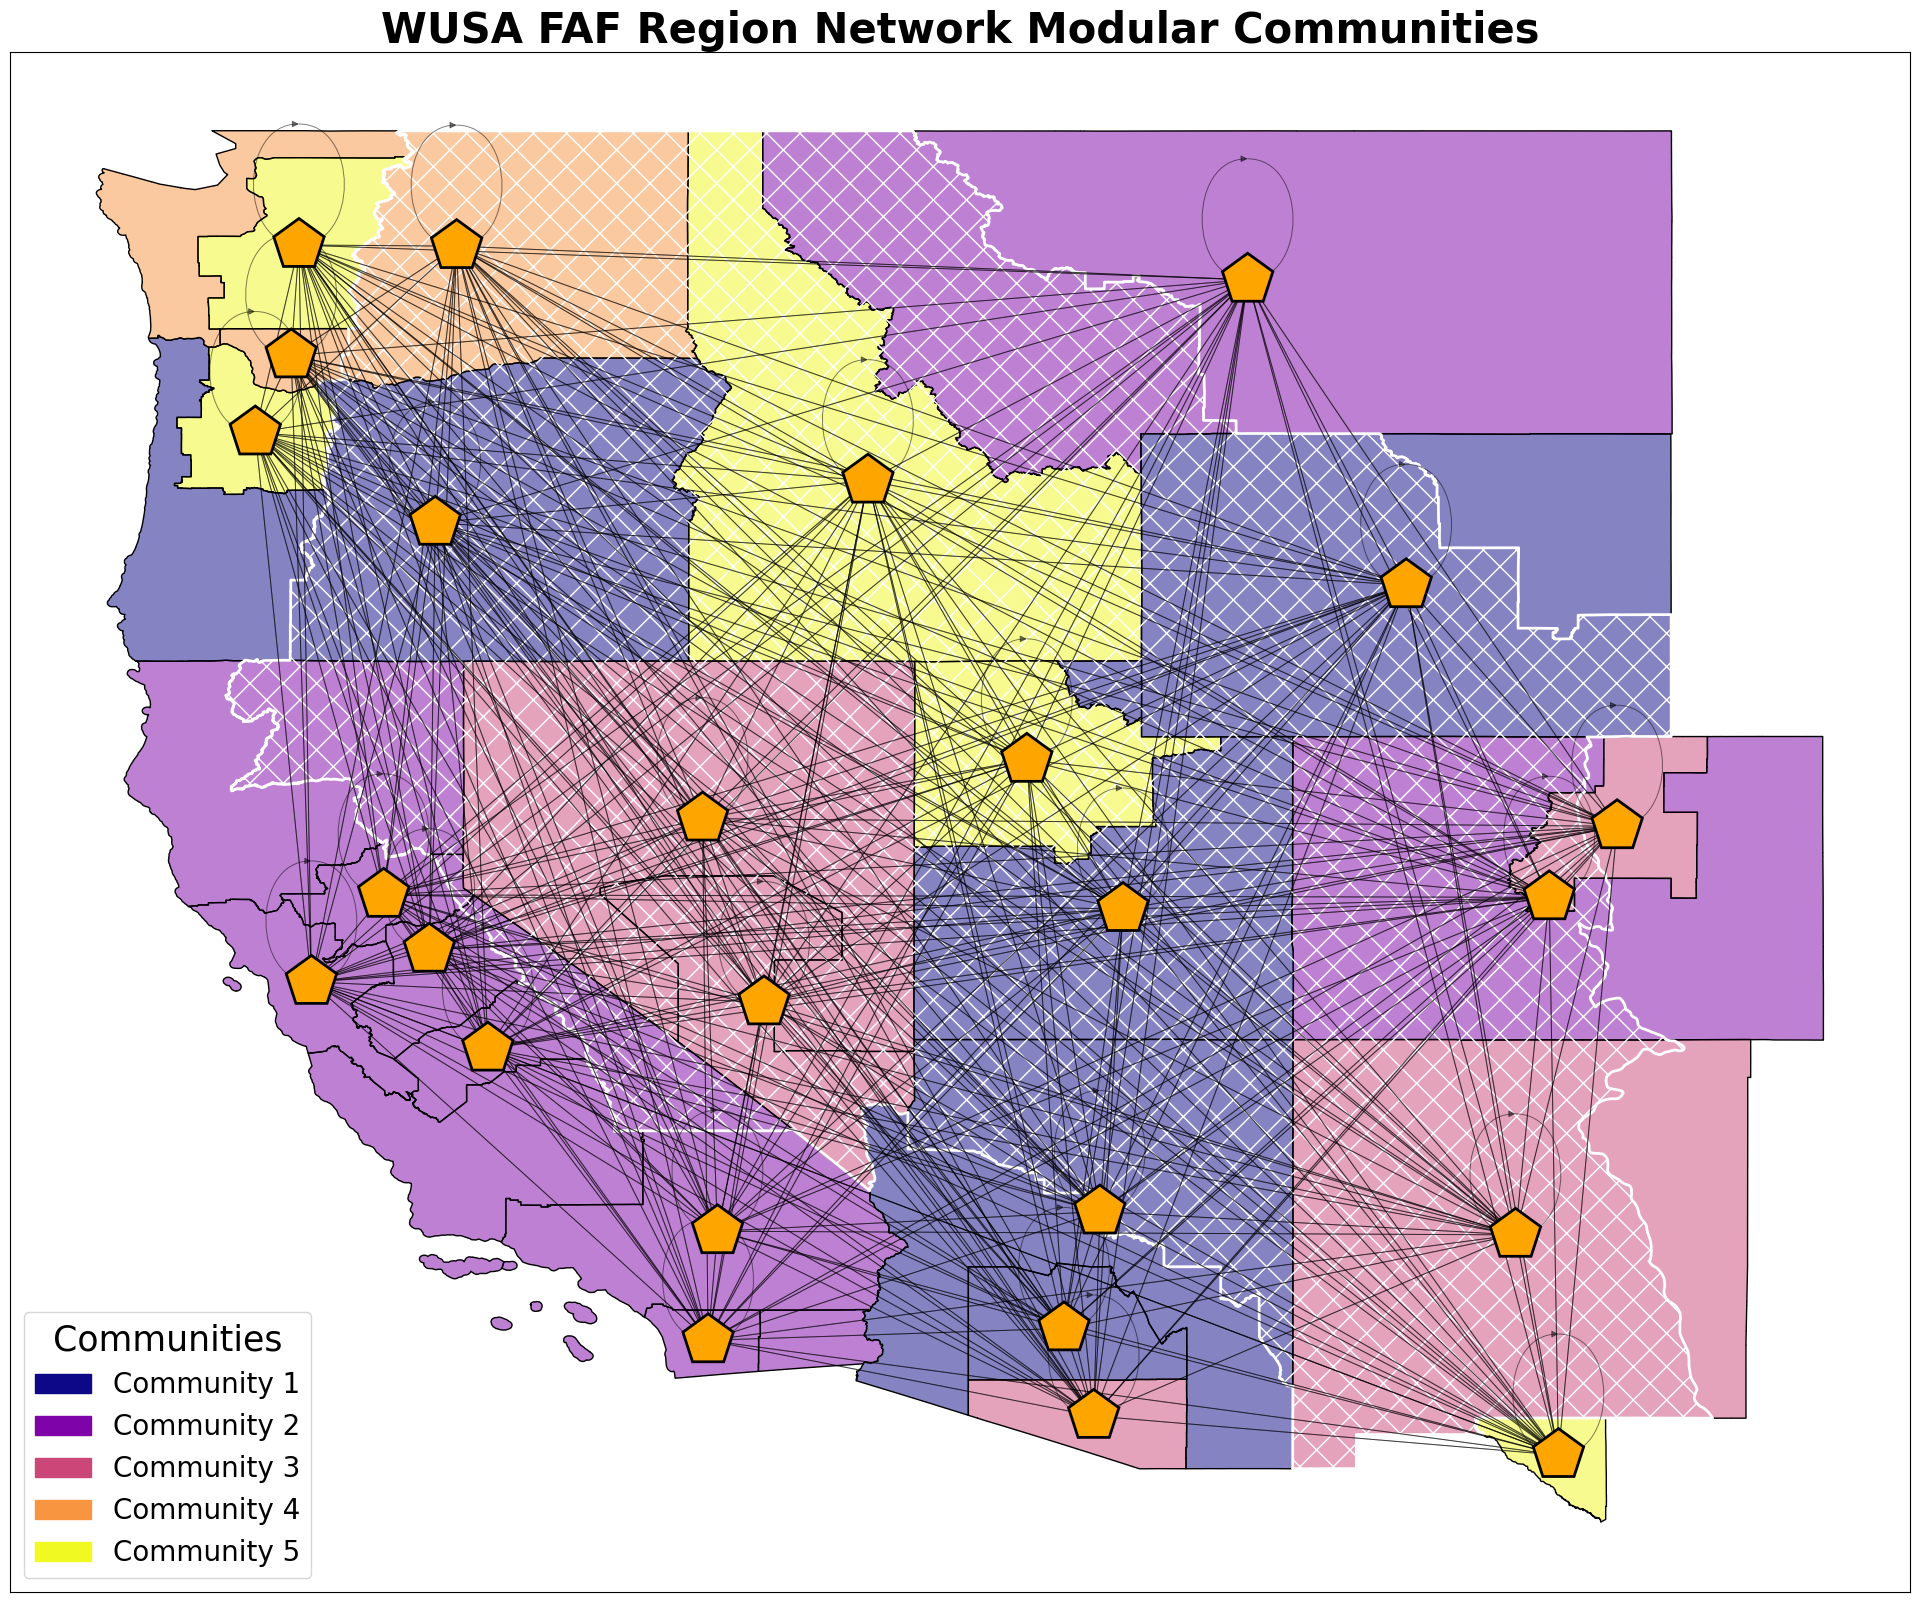

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
from matplotlib.patches import RegularPolygon, Patch
import community as community_louvain

IMW_Filtered_FAF_df['origin_LAT'] = pd.to_numeric(IMW_Filtered_FAF_df['origin_LAT'], errors='coerce')
IMW_Filtered_FAF_df['origin_LON'] = pd.to_numeric(IMW_Filtered_FAF_df['origin_LON'], errors='coerce')
IMW_Filtered_FAF_df['destination_LAT'] = pd.to_numeric(IMW_Filtered_FAF_df['destination_LAT'], errors='coerce')
IMW_Filtered_FAF_df['destination_LON'] = pd.to_numeric(IMW_Filtered_FAF_df['destination_LON'], errors='coerce')

# update to your file path
gdf = gpd.read_file('FAF_IMW_Region_V2.shp', encoding='utf-8')
gdf = gdf.to_crs(epsg=4326)

# update to your file path
gdf2 = gpd.read_file('iw_boundary.shp', encoding='utf-8')
gdf2 = gdf2.to_crs(epsg=4326)

# Create an empty DiGraph
G = nx.DiGraph()

# Dictionary for node positions based on lat and lon
positions = {}

# Iterate through the DataFrame and add edges with weights and node positions
for index, row in IMW_Filtered_FAF_df.iterrows():
    orig = row['dms_orig']
    dest = row['dms_dest']
    weight = row['tons_2017']
    
    # Store the position of the nodes using the provided lat and lon
    positions[orig] = (row['origin_LON'], row['origin_LAT'])
    positions[dest] = (row['destination_LON'], row['destination_LAT'])
    
    # Add the weighted edge
    G.add_edge(orig, dest, weight=weight)

print(len(G.nodes()))

# Convert the DiGraph to an undirected graph
G_undirected = G.to_undirected()

# Detect the communities
partition = community_louvain.best_partition(G_undirected, resolution=1.0)

# Manually defined colors for each community
zone_colors = {
     # community 1
    '041': '#0d088780',
    '049': '#0d088780',
    '419': '#0d088780',
    '499': '#0d088780',
    '560': '#0d088780',
    
    # community 2
    '061': '#7e03a880',
    '062': '#7e03a880',
    '063': '#7e03a880',
    '064': '#7e03a880',
    '065': '#7e03a880',
    '069': '#7e03a880',
    '089': '#7e03a880',
    '300': '#7e03a880',
    
    # community 3
    '042': '#cc477880',
    '081': '#cc477880',
    '321': '#cc477880',
    '329': '#cc477880',
    '350': '#cc477880',

    # community 4
    '532': '#f8954080',
    '539': '#f8954080',

    # community 5
    '160': '#f0f92180',
    '411': '#f0f92180',
    '485': '#f0f92180',
    '491': '#f0f92180',
    '531': '#f0f92180'}

# Default color for any FAF_Zone not in the zone_colors dictionary
default_color = 'grey'

# Directly map the colors to the FAF_zone column in gdf using the zone_colors dictionary
gdf['zone_color'] = gdf['FAF_Zone'].map(zone_colors).fillna(default_color)


# Apply modularity analysis to get a mapping of nodes to communities
communities = set(partition.values())
print(f"Number of communities: {len(communities)}")

# Color nodes according to their community
colors = [partition[node] for node in G.nodes()]
cmap = cm.get_cmap('plasma', max(colors)+1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(25, 20))

# Plot the FAF zones with the assigned colors
gdf.plot(ax=ax, color=gdf['zone_color'], edgecolor='k')  # RGBA for turquoise with 50% transparency

gdf2_color = 'grey'  # Choose an appropriate color

# Step 2: Plot gdf2
gdf2.plot(ax=ax, edgecolor='white', facecolor='none', hatch='X', linewidth=2)

nx.draw_networkx_edges(G, positions, edge_color='black', width=0.7, alpha=0.5, ax=ax)

# Set the desired thickness for the edge
edge_thickness = 2  # You can increase this value for a thicker edge

# Adjust the radius for pentagonal node size if needed
pentagon_radius = 0.35  # Increase this value if the pentagons are too small

# Draw pentagonal nodes using RegularPolygon with colors according to their community
for node, position in positions.items():
    color = cmap(partition[node] / max(colors))
    # Add a black outline to the pentagon with increased thickness
    polygon = RegularPolygon(position, numVertices=5,  facecolor='orange', radius=pentagon_radius, edgecolor='black', linewidth=edge_thickness, zorder=2)
    ax.add_patch(polygon)

# Sort the communities
sorted_communities = sorted(list(communities))

# Create a legend with colored patches
legend_patches = [Patch(color=cmap(i / max(colors)), label=f"Community {i+1}") for i in range(max(colors)+1)]
ax.legend(handles=legend_patches, loc="lower left", title="Communities", fontsize=20, title_fontsize=25)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Set title with increased size and boldness
plt.title("WUSA FAF Region Network Modular Communities", fontsize=30, fontweight='bold')

# Add axis labels
# ax.set_xlabel('Longitude', fontsize=25)
# ax.set_ylabel('Latitude', fontsize=25)

plt.show()


25
Number of communities: 5


C:\Users\ecs389\AppData\Local\Temp\ipykernel_11052\4166659155.py:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', max(colors)+1)


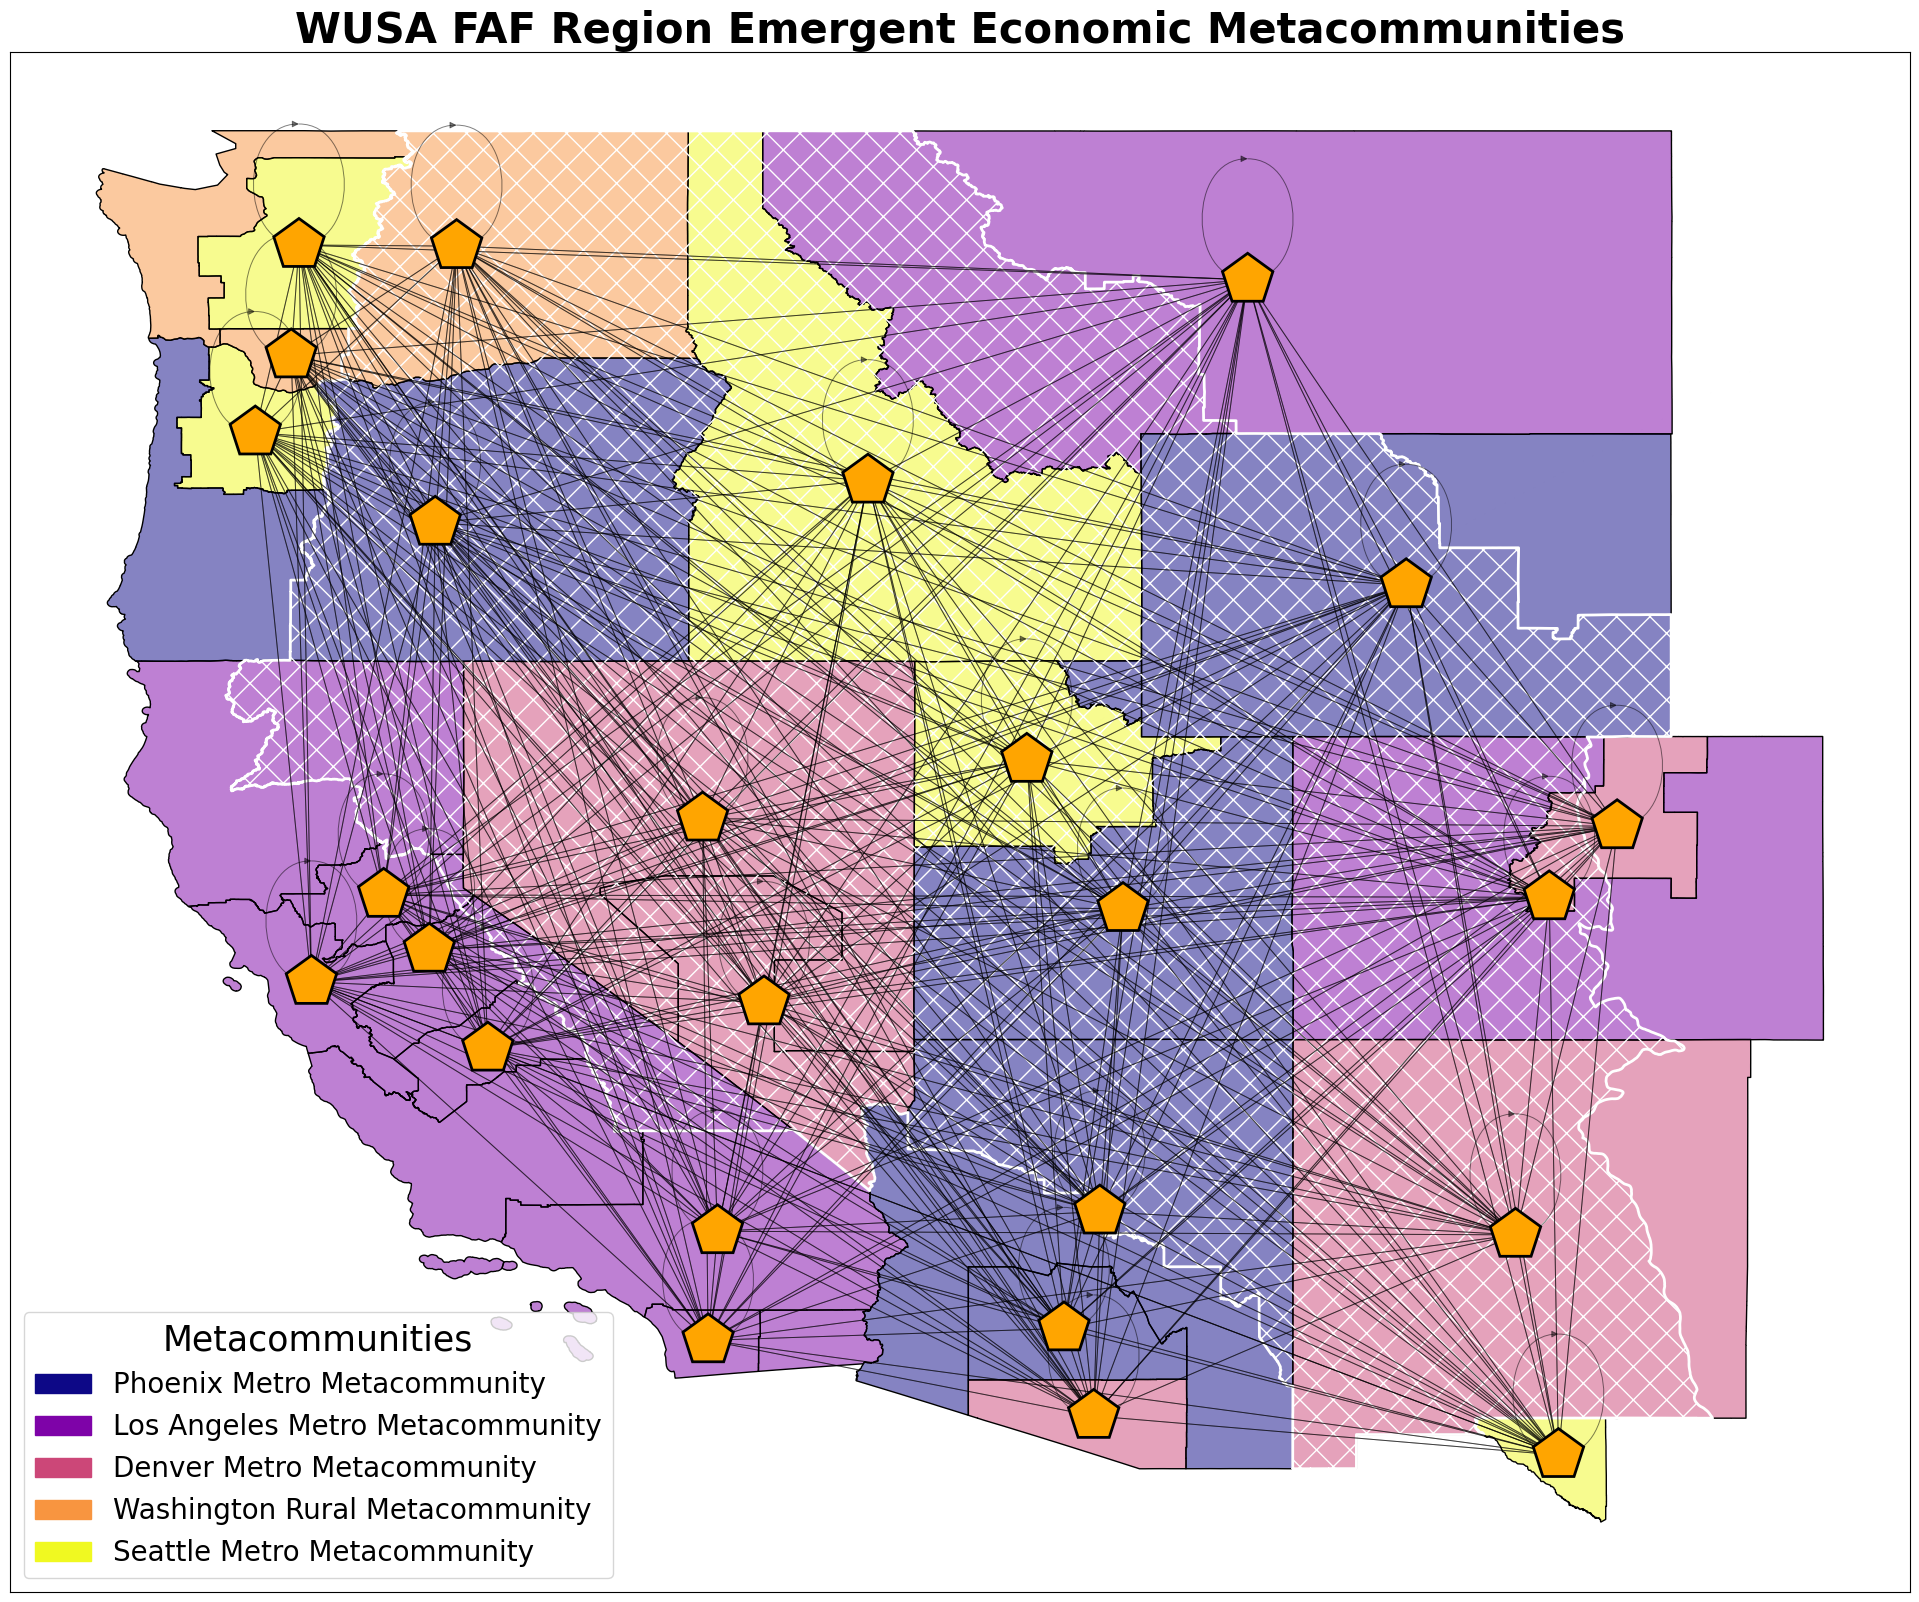

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
from matplotlib.patches import RegularPolygon, Patch
import community as community_louvain

IMW_Filtered_FAF_df['origin_LAT'] = pd.to_numeric(IMW_Filtered_FAF_df['origin_LAT'], errors='coerce')
IMW_Filtered_FAF_df['origin_LON'] = pd.to_numeric(IMW_Filtered_FAF_df['origin_LON'], errors='coerce')
IMW_Filtered_FAF_df['destination_LAT'] = pd.to_numeric(IMW_Filtered_FAF_df['destination_LAT'], errors='coerce')
IMW_Filtered_FAF_df['destination_LON'] = pd.to_numeric(IMW_Filtered_FAF_df['destination_LON'], errors='coerce')

# update to your file path
gdf = gpd.read_file('FAF_IMW_Region_V2.shp', encoding='utf-8')
gdf = gdf.to_crs(epsg=4326)

# update to your file path
gdf2 = gpd.read_file('iw_boundary.shp', encoding='utf-8')
gdf2 = gdf2.to_crs(epsg=4326)

# Create an empty DiGraph
G = nx.DiGraph()


# Dictionary for node positions based on lat and lon
positions = {}

# Iterate through the DataFrame and add edges with weights and node positions
for index, row in IMW_Filtered_FAF_df.iterrows():
    orig = row['dms_orig']
    dest = row['dms_dest']
    weight = row['tons_2017']
    
    # Store the position of the nodes using the provided lat and lon
    positions[orig] = (row['origin_LON'], row['origin_LAT'])
    positions[dest] = (row['destination_LON'], row['destination_LAT'])
    
    # Add the weighted edge
    G.add_edge(orig, dest, weight=weight)

print(len(G.nodes()))

# Convert the DiGraph to an undirected graph
G_undirected = G.to_undirected()

# Detect the communities
partition = community_louvain.best_partition(G_undirected, resolution=1.0)

# Manually defined colors for each community
zone_colors = {
     # community 1
    '041': '#0d088780',
    '049': '#0d088780',
    '419': '#0d088780',
    '499': '#0d088780',
    '560': '#0d088780',
    
    # community 2
    '061': '#7e03a880',
    '062': '#7e03a880',
    '063': '#7e03a880',
    '064': '#7e03a880',
    '065': '#7e03a880',
    '069': '#7e03a880',
    '089': '#7e03a880',
    '300': '#7e03a880',
    
    # community 3
    '042': '#cc477880',
    '081': '#cc477880',
    '321': '#cc477880',
    '329': '#cc477880',
    '350': '#cc477880',

    # community 4
    '532': '#f8954080',
    '539': '#f8954080',

    # community 5
    '160': '#f0f92180',
    '411': '#f0f92180',
    '485': '#f0f92180',
    '491': '#f0f92180',
    '531': '#f0f92180'}

# Default color for any FAF_Zone not in the zone_colors dictionary
default_color = 'grey'

# Directly map the colors to the FAF_zone column in gdf using the zone_colors dictionary
gdf['zone_color'] = gdf['FAF_Zone'].map(zone_colors).fillna(default_color)


# Apply modularity analysis to get a mapping of nodes to communities
communities = set(partition.values())
print(f"Number of communities: {len(communities)}")

# Color nodes according to their community
colors = [partition[node] for node in G.nodes()]
cmap = cm.get_cmap('plasma', max(colors)+1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(25, 20))

# Plot the FAF zones with the assigned colors
gdf.plot(ax=ax, color=gdf['zone_color'], edgecolor='k')  # RGBA for turquoise with 50% transparency

gdf2_color = 'grey'  # Choose an appropriate color

# Step 2: Plot gdf2
gdf2.plot(ax=ax, edgecolor='white', facecolor='none', hatch='X', linewidth=2)

nx.draw_networkx_edges(G, positions, edge_color='black', width=0.7, alpha=0.5, ax=ax)

# Set the desired thickness for the edge
edge_thickness = 2  # You can increase this value for a thicker edge

# Adjust the radius for pentagonal node size if needed
pentagon_radius = 0.35  # Increase this value if the pentagons are too small

# Draw pentagonal nodes using RegularPolygon with colors according to their community
for node, position in positions.items():
    color = cmap(partition[node] / max(colors))
    # Add a black outline to the pentagon with increased thickness
    polygon = RegularPolygon(position, numVertices=5,  facecolor='orange', radius=pentagon_radius, edgecolor='black', linewidth=edge_thickness, zorder=2)
    ax.add_patch(polygon)

# Define custom names for each community
community_names = [
    "Phoenix Metro Metacommunity",
    "Los Angeles Metro Metacommunity",
    "Denver Metro Metacommunity",
    "Washington Rural Metacommunity",
    "Seattle Metro Metacommunity"
]

# Sort the communities
sorted_communities = sorted(list(communities))

# Create a legend with colored patches
legend_patches = [Patch(color=cmap(i / max(colors)), label=community_names[i]) for i in range(max(colors)+1)]
ax.legend(handles=legend_patches, loc="lower left", title="Metacommunities", fontsize=20, title_fontsize=25)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Set title with increased size and boldness
plt.title("WUSA FAF Region Emergent Economic Metacommunities", fontsize=30, fontweight='bold')

# Add axis labels
# ax.set_xlabel('Longitude', fontsize=25)
# ax.set_ylabel('Latitude', fontsize=25)

plt.savefig("E&S_Figure2.png", dpi=1200, bbox_inches="tight")
plt.show()



In [37]:
# Create a dictionary to map each node to its FAF region name
# Assuming the 'dms_orig' column holds the nodes and there's a column named 'FAF Region Name' that has the region name
node_to_name = {row['dms_orig']: row['Commodity_Origin_Location'] for index, row in IMW_Filtered_FAF_df.iterrows()}

# Create a dictionary to group nodes by their community
community_nodes = {}
for node, community in partition.items():
    if community not in community_nodes:
        community_nodes[community] = [node]
    else:
        community_nodes[community].append(node)

# Print out each community, its nodes, and their corresponding FAF region names
for community, nodes in community_nodes.items():
    print(f"Community {community}:")
    for node in nodes:
        name = node_to_name.get(node, "Unknown")  # Get the FAF region name or 'Unknown' if not found
        print(f" - {node} ({name})")
    print("\n")  # Separate communities by a newline for clarity

Community 0:
 - 41 (Phoenix-Mesa-Scottsdale, AZ CFS Area)
 - 419 (Remainder of Oregon)
 - 49 (Remainder of Arizona)
 - 499 (Remainder of Utah)
 - 560 (Wyoming)


Community 1:
 - 61 (Los Angeles-Long Beach, CA CFS Area)
 - 69 (Remainder of California)
 - 62 (Sacramento-Roseville, CA CFS Area)
 - 64 (San Jose-San Francisco-Oakland, CA CFS Area)
 - 89 (Remainder of Colorado)
 - 63 (San Diego-Carlsbad, CA CFS Area)
 - 65 (Fresno-Madera, CA CFS Area)
 - 300 (Montana)


Community 4:
 - 42 (Tucson-Nogales, AZ CFS Area)
 - 81 (Denver-Aurora, CO CFS Area)
 - 350 (New Mexico)
 - 321 (Las Vegas-Henderson, NV-AZ CFS Area (NV Part))
 - 329 (Remainder of Nevada)


Community 3:
 - 532 (Portland-Vancouver-Salem, OR-WA CFS Area (WA Part))
 - 539 (Remainder of Washington)


Community 2:
 - 411 (Portland-Vancouver-Salem, OR-WA CFS Area (OR Part))
 - 485 (El Paso-Las Cruces, TX-NM CFS Area (TX Part))
 - 491 (Salt Lake City-Provo-Orem, UT CFS Area)
 - 531 (Seattle-Tacoma, WA CFS Area)
 - 160 (Idaho)




In [38]:
# Compute degree centrality for all nodes in the graph
degree_centrality = nx.degree_centrality(G)

# Identify the "lead" node in each community based on degree centrality
lead_nodes = {}
for node, community in partition.items():
    if community not in lead_nodes:
        lead_nodes[community] = node
    else:
        if degree_centrality[node] > degree_centrality[lead_nodes[community]]:
            lead_nodes[community] = node

# Print out the lead node for each community
for community, lead_node in lead_nodes.items():
    faf_name = node_to_name.get(lead_node, "Unknown")  # Get the FAF region name or 'Unknown' if not found
    print(f"Community {community}: Lead Node = {lead_node} ({faf_name}) with Degree Centrality = {degree_centrality[lead_node]:.2f}")

Community 0: Lead Node = 41 (Phoenix-Mesa-Scottsdale, AZ CFS Area) with Degree Centrality = 2.08
Community 1: Lead Node = 61 (Los Angeles-Long Beach, CA CFS Area) with Degree Centrality = 2.08
Community 4: Lead Node = 42 (Tucson-Nogales, AZ CFS Area) with Degree Centrality = 2.08
Community 3: Lead Node = 532 (Portland-Vancouver-Salem, OR-WA CFS Area (WA Part)) with Degree Centrality = 2.08
Community 2: Lead Node = 411 (Portland-Vancouver-Salem, OR-WA CFS Area (OR Part)) with Degree Centrality = 2.08


## Directed Network Modularity

In [39]:
AZ_CR = {1 : '16.64', 2 : '16.56', 3 : '16.68', 4 : '16.64',
         5 : '15.13', 6 : '15.41', 7 : '15.75', 8 : '16.63',
         9 : '16.68', 10 : '20.31', 11 : '20.39', 12 : '21.43',
         13 : '20.76', 14 : '21.41', 15 : '20.44', 17 : '17.78',
         18 : '17.16', 19 : '20.69', 20 : '19.31', 21 : '17.79',
         22 : '18.14', 23 : '19.07', 24 : '19.93', 25 : '21.41',
         26 : '20.08', 27 : '20.09', 28 : '19.51', 29 : '20.12',
         30 : '18.29', 31 : '22.24', 32 : '20.30', 33 : '20.52',
         34 : '19.23', 35 : '18.19', 36 : '18.11', 37 : '23.17',
         38 : '17.96', 39 : '19.77', 40 : '19.26', 41 : '16.78',
         43 : '17.42'}

CA_CR = {1 : '19.96', 2 : '19.92', 3 : '20.10', 4 : '22.15',
         5 : '19.88', 6 : '20.57', 7 : '20.36', 8 : '19.89',
         9 : '19.95', 10 : '24.56', 11 : '35.01', 12 : '41.53',
         13 : '27.28', 14 : '27.47', 15 : '37.39', 17 : '21.35',
         18 : '20.44', 19 : '22.88', 20 : '24.42', 21 : '21.78',
         22 : '22.75', 23 : '23.87', 24 : '24.04', 25 : '24.43',
         26 : '23.30', 27 : '24.47', 28 : '23.71', 29 : '25.34',
         30 : '21.63', 31 : '25.82', 32 : '23.65', 33 : '23.94',
         34 : '22.18', 35 : '21.18', 36 : '21.49', 37 : '27.07',
         38 : '20.78', 39 : '23.04', 40 : '22.66', 41 : '20.05',
         43 : '20.78'}

CO_CR = {1 : '16.99', 2 : '16.94', 3 : '17.08', 4 : '17.81',
         5 : '16.17', 6 : '16.53', 7 : '16.65', 8 : '16.97',
         9 : '17.02', 10 : '22.11', 11 : '28.74', 12 : '33.21',
         13 : '23.73', 14 : '24.48', 15 : '29.58', 17 : '18.28',
         18 : '17.56', 19 : '21.64', 20 : '20.53', 21 : '18.34',
         22 : '19.02', 23 : '20.09', 24 : '20.61', 25 : '22.53',
         26 : '20.89', 27 : '20.77', 28 : '20.10', 29 : '21.16',
         30 : '18.49', 31 : '24.00', 32 : '21.15', 33 : '21.35',
         34 : '19.93', 35 : '18.63', 36 : '18.17', 37 : '23.57',
         38 : '18.41', 39 : '20.09', 40 : '19.89', 41 : '17.15',
         43 : '17.72'}

ID_CR = {1 : '22.85', 2 : '22.79', 3 : '22.93', 4 : '23.67',
         5 : '21.97', 6 : '22.35', 7 : '22.43', 8 : '22.82',
         9 : '22.87', 10 : '26.79', 11 : '31.35', 12 : '33.47',
         13 : '29.04', 14 : '27.68', 15 : '32.07', 17 : '24.14',
         18 : '23.33', 19 : '25.72', 20 : '27.04', 21 : '24.49',
         22 : '25.36', 23 : '26.50', 24 : '26.05', 25 : '25.29',
         26 : '24.98', 27 : '26.80', 28 : '26.26', 29 : '25.40',
         30 : '24.50', 31 : '28.23', 32 : '25.33', 33 : '25.75',
         34 : '24.72', 35 : '23.55', 36 : '23.75', 37 : '26.53',
         38 : '22.79', 39 : '25.71', 40 : '24.97', 41 : '22.94',
         43 : '23.64'}

MT_CR = {1 : '21.27', 2 : '21.19', 3 : '21.29', 4 : '20.72',
         5 : '19.18', 6 : '19.33', 7 : '19.87', 8 : '21.30',
         9 : '21.35', 10 : '24.09', 11 : '17.85', 12 : '16.46',
         13 : '22.13', 14 : '22.68', 15 : '17.30', 17 : '21.26',
         18 : '20.96', 19 : '17.24', 20 : '23.35', 21 : '22.40',
         22 : '22.64', 23 : '23.09', 24 : '24.09', 25 : '24.89',
         26 : '24.10', 27 : '23.64', 28 : '23.32', 29 : '23.90',
         30 : '22.86', 31 : '25.21', 32 : '24.27', 33 : '24.60',
         34 : '23.91', 35 : '22.99', 36 : '22.02', 37 : '25.24',
         38 : '22.67', 39 : '24.41', 40 : '23.58', 41 : '24.41',
         43 : '22.06'}

NV_CR = {   1: '17.68',  2: '17.63',  3: '17.65',  4: '15.98',
            5: '14.39',  6: '14.09',  7: '15.21',  8: '17.84',
            9: '17.86', 10: '23.07', 11: '22.60', 12: '23.79',
           13: '22.22', 14: '23.65', 15: '22.09', 17: '18.97',
           18: '18.43', 19: '23.49', 20: '20.09', 21: '18.55',
           22: '19.05', 23: '19.85', 24: '21.08', 25: '24.19',
           26: '22.09', 27: '21.20', 28: '20.65', 29: '20.23',
           30: '18.95', 31: '25.78', 32: '22.28', 33: '22.28',
           34: '21.08', 35: '19.64', 36: '19.07', 37: '24.64',
           38: '17.98', 39: '20.50', 40: '20.04', 41: '18.04',
           43: '18.24'}

NM_CR = {1 : '20.14', 2 : '20.07', 3 : '20.19', 4 : '20.06',
         5 : '18.06', 6 : '18.19', 7 : '18.76', 8 : '20.20',
         9 : '20.25', 10 : '23.99', 11 : '21.62', 12 : '21.47',
         13 : '24.23', 14 : '24.37', 15 : '21.34', 17 : '21.36',
         18 : '20.63', 19 : '22.17', 20 : '23.91', 21 : '21.75',
         22 : '22.41', 23 : '23.47', 24 : '23.55', 25 : '25.19',
         26 : '23.79', 27 : '22.70', 28 : '22.25', 29 : '22.33',
         30 : '21.83', 31 : '26.03', 32 : '23.99', 33 : '24.34',
         34 : '23.90', 35 : '21.46', 36 : '20.97', 37 : '24.06',
         38 : '21.14', 39 : '23.32', 40 : '23.08', 41 : '20.34',
         43 : '20.96'}

OR_CR = {1 : '20.96', 2 : '20.88', 3 : '20.93', 4 : '20.09',
         5 : '18.56', 6 : '18.69', 7 : '19.27', 8 : '21.02',
         9 : '21.05', 10 : '25.42', 11 : '38.42', 12 : '46.01',
         13 : '27.31', 14 : '27.26', 15 : '40.25', 17 : '21.99',
         18 : '21.42', 19 : '23.95', 20 : '23.63', 21 : '22.03',
         22 : '22.60', 23 : '23.34', 24 : '24.06', 25 : '23.99',
         26 : '23.42', 27 : '24.99', 28 : '24.47', 29 : '24.09',
         30 : '22.42', 31 : '26.31', 32 : '23.95', 33 : '24.28',
         34 : '22.26', 35 : '21.09', 36 : '22.00', 37 : '24.53',
         38 : '19.70', 39 : '23.39', 40 : '22.96', 41 : '21.17',
         43 : '21.60'}

TX_CR = {1 : '20.24', 2 : '20.21', 3 : '20.37', 4 : '22.10',
         5 : '19.26', 6 : '19.67', 7 : '19.93', 8 : '20.24',
         9 : '20.31', 10 : '25.25', 11 : '35.13', 12 : '36.35',
         13 : '27.86', 14 : '28.33', 15 : '37.35', 17 : '21.35',
         18 : '20.51', 19 : '19.83', 20 : '24.97', 21 : '22.30',
         22 : '23.29', 23 : '24.34', 24 : '24.58', 25 : '24.48',
         26 : '23.48', 27 : '23.75', 28 : '23.20', 29 : '23.60',
         30 : '21.92', 31 : '25.78', 32 : '24.34', 33 : '24.92',
         34 : '23.41', 35 : '22.14', 36 : '22.29', 37 : '28.41',
         38 : '22.72', 39 : '23.38', 40 : '23.61', 41 : '20.39',
         43 : '21.06'}

UT_CR = {1 : '23.26', 2 : '23.23', 3 : '23.27', 4 : '22.07',
         5 : '19.61', 6 : '19.27', 7 : '20.55', 8 : '23.48',
         9 : '23.54', 10 : '27.39', 11 : '25.00', 12 : '24.80',
         13 : '27.62', 14 : '28.42', 15 : '24.71', 17 : '24.65',
         18 : '23.88', 19 : '25.42', 20 : '27.47', 21 : '24.90',
         22 : '25.82', 23 : '26.92', 24 : '27.33', 25 : '29.90',
         26 : '27.82', 27 : '27.47', 28 : '26.90', 29 : '26.11',
         30 : '24.95', 31 : '29.36', 32 : '27.82', 33 : '27.79',
         34 : '26.13', 35 : '25.16', 36 : '24.43', 37 : '28.14',
         38 : '22.98', 39 : '25.20', 40 : '25.51', 41 : '23.67',
         43 : '23.98'}

WA_CR = {1 : '20.56', 2 : '20.48', 3 : '20.66', 4 : '21.50',
         5 : '19.65', 6 : '20.23', 7 : '20.26', 8 : '20.51',
         9 : '20.56', 10 : '24.86', 11 : '34.45', 12 : '39.44',
         13 : '27.33', 14 : '28.30', 15 : '37.01', 17 : '21.68',
         18 : '20.96', 19 : '22.61', 20 : '24.17', 21 : '22.09',
         22 : '22.61', 23 : '23.75', 24 : '24.49', 25 : '24.78',
         26 : '23.83', 27 : '24.97', 28 : '24.16', 29 : '28.38',
         30 : '22.56', 31 : '26.11', 32 : '24.92', 33 : '25.60',
         34 : '23.51', 35 : '23.80', 36 : '22.29', 37 : '31.13',
         38 : '25.30', 39 : '24.28', 40 : '24.07', 41 : '20.67',
         43 : '21.53'}

WY_CR = {1 : '28.90', 2 : '28.84', 3 : '28.85', 4 : '26.73',
         5 : '24.14', 6 : '23.43', 7 : '25.35', 8 : '29.15',
         9 : '29.22', 10 : '23.43', 11 : '11.38', 12 : '10.88',
         13 : '18.86', 14 : '18.30', 15 : '11.01', 17 : '29.44',
         18 : '29.02', 19 : '26.43', 20 : '31.07', 21 : '30.35',
         22 : '29.98', 23 : '31.06', 24 : '32.68', 25 : '34.83',
         26 : '33.10', 27 : '31.15', 28 : '30.87', 29 : '31.01',
         30 : '30.59', 31 : '31.01', 32 : '33.50', 33 : '34.09',
         34 : '35.03', 35 : '31.30', 36 : '30.24', 37 : '34.67',
         38 : '31.86', 39 : '32.23', 40 : '32.70', 41 : '29.25',
         43 : '29.71'}

state_CR_map = {41 : AZ_CR, 42 : AZ_CR, 49 : AZ_CR,
                61 : CA_CR, 62 : CA_CR, 63 : CA_CR, 64 : CA_CR, 65 : CA_CR, 69 : CA_CR,
                81 : CO_CR, 89 : CO_CR, 
                160 : ID_CR,  
                300 : MT_CR,    
                321 : NV_CR, 329 : NV_CR,
                350 : NM_CR,
                411 : OR_CR, 419 : OR_CR, 
                485 : TX_CR,
                491 : UT_CR, 499 : UT_CR,
                531 : WA_CR, 532 : WA_CR, 539 : WA_CR,
                560 : WY_CR}

In [40]:
IMW_Filtered_FAF_df.head()

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  fr_outmode  \
0      NaN        41        61      NaN        NaN         1         NaN   
1      NaN        41        69      NaN        NaN         1         NaN   
2      NaN        42        61      NaN        NaN         5         NaN   
3      NaN        42        62      NaN        NaN         5         NaN   
4      NaN        42        64      NaN        NaN         5         NaN   

   sctg2  trade_type  dist_band  tons_2017  tons_2018  tons_2019  tons_2020  \
0      1           1          3  60.903824  61.657617  60.398447  56.226942   
1      1           1          3  24.143476  24.442294  23.943135  22.289468   
2      1           1          4   0.000050   0.000051   0.000050   0.000046   
3      1           1          5   0.000050   0.000051   0.000050   0.000046   
4      1           1          5   0.000050   0.000051   0.000050   0.000046   

   tons_2021  tons_2022  tons_2023  tons_2025  tons_2030  tons_2035  \
0  62.244575  62.325348  64.444855  58.764088  60.490234  65.057915   
1  24.674976  24.706996  24.322107  21.096422  21.041481  22.474911   
2   0.000051   0.000051   0.000058   0.000058   0.000069   0.000085   
3   0.000051   0.000051   0.000057   0.000051   0.000058   0.000071   
4   0.000051   0.000051   0.000057   0.000054   0.000063   0.000079   

   tons_2040  tons_2045  tons_2050  value_2017  value_2018  value_2019  \
0  71.838669  79.006943  84.521317  264.730042  268.006546  262.533326   
1  24.593756  26.732998  28.261583  104.944206  106.243077  104.073384   
2   0.000107   0.000135   0.000163    0.000261    0.000264    0.000259   
3   0.000088   0.000109   0.000129    0.000121    0.000122    0.000120   
4   0.000099   0.000125   0.000150    0.001241    0.001256    0.001231   

   value_2020  value_2021  value_2022  value_2023  value_2025  value_2030  \
0  244.401086  270.557870  270.908966  280.121805  255.429272  262.932296   
1   96.885407  107.254472  107.393653  105.720659   91.699606   91.460794   
2    0.000241    0.000267    0.000267    0.000301    0.000301    0.000360   
3    0.000112    0.000124    0.000124    0.000138    0.000123    0.000141   
4    0.001146    0.001268    0.001270    0.001423    0.001331    0.001573   

   value_2035  value_2040  value_2045  value_2050  current_value_2018  \
0  282.786587  312.260423  343.418687  367.387961          260.059067   
1   97.691468  106.901430  116.200053  122.844340          103.092540   
2    0.000444    0.000560    0.000707    0.000853            0.000256   
3    0.000172    0.000213    0.000264    0.000313            0.000119   
4    0.001956    0.002468    0.003095    0.003733            0.001219   

   current_value_2019  current_value_2020  current_value_2021  \
0          249.878029          213.369078          297.316043   
1           99.056575           84.583708          117.861939   
2            0.000246            0.000210            0.000293   
3            0.000114            0.000098            0.000136   
4            0.001171            0.001000            0.001394   

   current_value_2022  tmiles_2017  tmiles_2018  tmiles_2019  tmiles_2020  \
0          366.837542    23.731764    24.025487    23.534839    21.909372   
1          145.421631    11.720670    11.865734    11.623412    10.820625   
2            0.000362     0.000026     0.000027     0.000026     0.000024   
3            0.000168     0.000048     0.000049     0.000048     0.000044   
4            0.001720     0.000047     0.000048     0.000047     0.000043   

   tmiles_2021  tmiles_2022  tmiles_2023  tmiles_2025  tmiles_2030  \
0    24.254201    24.285675    25.111561    22.897995    23.570605   
1    11.978691    11.994236    11.807388    10.241450    10.214778   
2     0.000027     0.000027     0.000030     0.000030     0.000036   
3     0.000049     0.000049     0.000054     0.000049     0.000055   
4     0.000048     0.000048     0.000054     0.000051     0.000059   

   tmiles_2035  tmiles

In [41]:
# Define the function
def get_consumption_rate(row):
    region_code = row['dms_orig']
    commodity_code = row['sctg2']

    state_cr_dict = state_CR_map.get(region_code)
    if state_cr_dict:
        return state_cr_dict.get(commodity_code)
    else:
        return None  # Or a default value

# Apply the function to the DataFrame
IMW_Filtered_FAF_df['consumption_rate'] = IMW_Filtered_FAF_df.apply(get_consumption_rate, axis=1)

In [42]:
IMW_Filtered_FAF_df.head()

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  fr_outmode  \
0      NaN        41        61      NaN        NaN         1         NaN   
1      NaN        41        69      NaN        NaN         1         NaN   
2      NaN        42        61      NaN        NaN         5         NaN   
3      NaN        42        62      NaN        NaN         5         NaN   
4      NaN        42        64      NaN        NaN         5         NaN   

   sctg2  trade_type  dist_band  tons_2017  tons_2018  tons_2019  tons_2020  \
0      1           1          3  60.903824  61.657617  60.398447  56.226942   
1      1           1          3  24.143476  24.442294  23.943135  22.289468   
2      1           1          4   0.000050   0.000051   0.000050   0.000046   
3      1           1          5   0.000050   0.000051   0.000050   0.000046   
4      1           1          5   0.000050   0.000051   0.000050   0.000046   

   tons_2021  tons_2022  tons_2023  tons_2025  tons_2030  tons_2035  \
0  62.244575  62.325348  64.444855  58.764088  60.490234  65.057915   
1  24.674976  24.706996  24.322107  21.096422  21.041481  22.474911   
2   0.000051   0.000051   0.000058   0.000058   0.000069   0.000085   
3   0.000051   0.000051   0.000057   0.000051   0.000058   0.000071   
4   0.000051   0.000051   0.000057   0.000054   0.000063   0.000079   

   tons_2040  tons_2045  tons_2050  value_2017  value_2018  value_2019  \
0  71.838669  79.006943  84.521317  264.730042  268.006546  262.533326   
1  24.593756  26.732998  28.261583  104.944206  106.243077  104.073384   
2   0.000107   0.000135   0.000163    0.000261    0.000264    0.000259   
3   0.000088   0.000109   0.000129    0.000121    0.000122    0.000120   
4   0.000099   0.000125   0.000150    0.001241    0.001256    0.001231   

   value_2020  value_2021  value_2022  value_2023  value_2025  value_2030  \
0  244.401086  270.557870  270.908966  280.121805  255.429272  262.932296   
1   96.885407  107.254472  107.393653  105.720659   91.699606   91.460794   
2    0.000241    0.000267    0.000267    0.000301    0.000301    0.000360   
3    0.000112    0.000124    0.000124    0.000138    0.000123    0.000141   
4    0.001146    0.001268    0.001270    0.001423    0.001331    0.001573   

   value_2035  value_2040  value_2045  value_2050  current_value_2018  \
0  282.786587  312.260423  343.418687  367.387961          260.059067   
1   97.691468  106.901430  116.200053  122.844340          103.092540   
2    0.000444    0.000560    0.000707    0.000853            0.000256   
3    0.000172    0.000213    0.000264    0.000313            0.000119   
4    0.001956    0.002468    0.003095    0.003733            0.001219   

   current_value_2019  current_value_2020  current_value_2021  \
0          249.878029          213.369078          297.316043   
1           99.056575           84.583708          117.861939   
2            0.000246            0.000210            0.000293   
3            0.000114            0.000098            0.000136   
4            0.001171            0.001000            0.001394   

   current_value_2022  tmiles_2017  tmiles_2018  tmiles_2019  tmiles_2020  \
0          366.837542    23.731764    24.025487    23.534839    21.909372   
1          145.421631    11.720670    11.865734    11.623412    10.820625   
2            0.000362     0.000026     0.000027     0.000026     0.000024   
3            0.000168     0.000048     0.000049     0.000048     0.000044   
4            0.001720     0.000047     0.000048     0.000047     0.000043   

   tmiles_2021  tmiles_2022  tmiles_2023  tmiles_2025  tmiles_2030  \
0    24.254201    24.285675    25.111561    22.897995    23.570605   
1    11.978691    11.994236    11.807388    10.241450    10.214778   
2     0.000027     0.000027     0.000030     0.000030     0.000036   
3     0.000049     0.000049     0.000054     0.000049     0.000055   
4     0.000048     0.000048     0.000054     0.000051     0.000059   

   tmiles_2035  tmiles

Due to CFS not having SCTG2 code 16, we have a NONE value for oil and Gas

In [43]:
IMW_Filtered_FAF_df['consumption_rate'].unique()

array(['16.64', '19.96', '16.99', '22.85', '21.27', '17.68', '20.14',
       '20.96', '20.24', '23.26', '20.56', '28.90', '16.56', '19.92',
       '16.94', '22.79', '21.19', '17.63', '20.07', '20.88', '20.21',
       '23.23', '20.48', '28.84', '16.68', '20.10', '17.08', '22.93',
       '21.29', '17.65', '20.19', '20.93', '20.37', '23.27', '20.66',
       '28.85', '22.15', '17.81', '23.67', '20.72', '15.98', '20.06',
       '20.09', '22.10', '22.07', '21.50', '26.73', '15.13', '19.88',
       '16.17', '21.97', '19.18', '14.39', '18.06', '18.56', '19.26',
       '19.61', '19.65', '24.14', '15.41', '20.57', '16.53', '22.35',
       '19.33', '14.09', '18.19', '18.69', '19.67', '19.27', '20.23',
       '23.43', '15.75', '20.36', '16.65', '22.43', '19.87', '15.21',
       '18.76', '19.93', '20.55', '20.26', '25.35', '16.63', '19.89',
       '16.97', '22.82', '21.30', '17.84', '20.20', '21.02', '23.48',
       '20.51', '29.15', '19.95', '17.02', '22.87', '21.35', '17.86',
       '20.25', '21.

In [44]:
FAF_communities={41 : '0',
                 42 : '2',
                 49 : '0',
                  61 : '1',
                  62 : '1',
                  63 : '1',
                  64 : '1',
                  65 : '1',
                  69 : '1',
                  81 : '2',
                  89 : '1',
                  160 : '4',
                  300 : '1',
                  321 : '2',
                  329 : '2',
                  350 : '2',
                  411 : '4',
                  419 : '0',
                  485 : '4',
                  491 : '4',
                  499 : '0',
                  531 : '4',
                  532 : '3',
                  539 : '3',
                  560 : '0'}

In [45]:
IMW_Filtered_FAF_df["FAF_Community"] = IMW_Filtered_FAF_df["dms_dest"].map(FAF_communities, na_action=None)
IMW_Filtered_FAF_df.head()

fr_orig  dms_orig  dms_dest  fr_dest  fr_inmode  dms_mode  fr_outmode  \
0      NaN        41        61      NaN        NaN         1         NaN   
1      NaN        41        69      NaN        NaN         1         NaN   
2      NaN        42        61      NaN        NaN         5         NaN   
3      NaN        42        62      NaN        NaN         5         NaN   
4      NaN        42        64      NaN        NaN         5         NaN   

   sctg2  trade_type  dist_band  tons_2017  tons_2018  tons_2019  tons_2020  \
0      1           1          3  60.903824  61.657617  60.398447  56.226942   
1      1           1          3  24.143476  24.442294  23.943135  22.289468   
2      1           1          4   0.000050   0.000051   0.000050   0.000046   
3      1           1          5   0.000050   0.000051   0.000050   0.000046   
4      1           1          5   0.000050   0.000051   0.000050   0.000046   

   tons_2021  tons_2022  tons_2023  tons_2025  tons_2030  tons_2035  \
0  62.244575  62.325348  64.444855  58.764088  60.490234  65.057915   
1  24.674976  24.706996  24.322107  21.096422  21.041481  22.474911   
2   0.000051   0.000051   0.000058   0.000058   0.000069   0.000085   
3   0.000051   0.000051   0.000057   0.000051   0.000058   0.000071   
4   0.000051   0.000051   0.000057   0.000054   0.000063   0.000079   

   tons_2040  tons_2045  tons_2050  value_2017  value_2018  value_2019  \
0  71.838669  79.006943  84.521317  264.730042  268.006546  262.533326   
1  24.593756  26.732998  28.261583  104.944206  106.243077  104.073384   
2   0.000107   0.000135   0.000163    0.000261    0.000264    0.000259   
3   0.000088   0.000109   0.000129    0.000121    0.000122    0.000120   
4   0.000099   0.000125   0.000150    0.001241    0.001256    0.001231   

   value_2020  value_2021  value_2022  value_2023  value_2025  value_2030  \
0  244.401086  270.557870  270.908966  280.121805  255.429272  262.932296   
1   96.885407  107.254472  107.393653  105.720659   91.699606   91.460794   
2    0.000241    0.000267    0.000267    0.000301    0.000301    0.000360   
3    0.000112    0.000124    0.000124    0.000138    0.000123    0.000141   
4    0.001146    0.001268    0.001270    0.001423    0.001331    0.001573   

   value_2035  value_2040  value_2045  value_2050  current_value_2018  \
0  282.786587  312.260423  343.418687  367.387961          260.059067   
1   97.691468  106.901430  116.200053  122.844340          103.092540   
2    0.000444    0.000560    0.000707    0.000853            0.000256   
3    0.000172    0.000213    0.000264    0.000313            0.000119   
4    0.001956    0.002468    0.003095    0.003733            0.001219   

   current_value_2019  current_value_2020  current_value_2021  \
0          249.878029          213.369078          297.316043   
1           99.056575           84.583708          117.861939   
2            0.000246            0.000210            0.000293   
3            0.000114            0.000098            0.000136   
4            0.001171            0.001000            0.001394   

   current_value_2022  tmiles_2017  tmiles_2018  tmiles_2019  tmiles_2020  \
0          366.837542    23.731764    24.025487    23.534839    21.909372   
1          145.421631    11.720670    11.865734    11.623412    10.820625   
2            0.000362     0.000026     0.000027     0.000026     0.000024   
3            0.000168     0.000048     0.000049     0.000048     0.000044   
4            0.001720     0.000047     0.000048     0.000047     0.000043   

   tmiles_2021  tmiles_2022  tmiles_2023  tmiles_2025  tmiles_2030  \
0    24.254201    24.285675    25.111561    22.897995    23.570605   
1    11.978691    11.994236    11.807388    10.241450    10.214778   
2     0.000027     0.000027     0.000030     0.000030     0.000036   
3     0.000049     0.000049     0.000054     0.000049     0.000055   
4     0.000048     0.000048     0.000054     0.000051     0.000059   

   tmiles_2035  tmiles

In [46]:
IMW_Filtered_FAF_df.to_csv('IMW_Filtered_FAF_Dataset_V1.csv', index=False)

## Mapping the Source & Sink Dynamic Metacommunity Equation

In [47]:
IMW_META_PLOT_DF =  pd.read_csv('IMW_FAF_MC_Total_plotting.csv') # update to your file path
IMW_META_PLOT_DF.head()

FAF Region                       FAF Region Name  Community       Export  \
0          41  Phoenix-Mesa-Scottsdale, AZ CFS Area          1  28946.55276   
1          49                  Remainder of Arizona          1  24694.99092   
2         419                   Remainder of Oregon          1  44805.93450   
3         499                     Remainder of Utah          1  55973.87967   
4         560                               Wyoming          1  68226.37175   

        Import  SelfFlow     TotalFlow  SelfFlowPercentage  \
0  46892.22788   75507.8  151346.60010               49.89   
1  25258.15301   23444.1   73397.19667               31.94   
2  26889.12556   69706.2  141401.22730               49.30   
3  11622.68982   15905.4   83501.95618               19.05   
4  43804.79757   57388.2  169419.36520               33.87   

   AverageConsumptionRate  TotalModularExport  \
0                   18.86         222647.7296   
1                   18.86         222647.7296   
2                   24.04         222647.7296   
3                   25.27         222647.7296   
4                   28.19         222647.7296   

   ExportPercentageToModularRegion  Alpha  Presence  
0                        13.001055   0.13     17510  
1                        11.091508   0.11       395  
2                        20.124137   0.20    -18522  
3                        25.140108   0.25    -44354  
4                        30.643192   0.31    -24860

In [48]:
# # From geopandas polygon centroid

FAF_Centroid_dest_LAT = {41 : '+33.185717',
                    42 : '+32.029909',
                    49 : '+34.728801',
                    61 : '+34.468867',
                    62 : '+38.910710',
                    63 : '+33.028208',
                    64 : '+37.761222',
                    65 : '+36.879999',
                    69 : '+38.186251',
                    81 : '+39.816789',
                    89 : '+38.878566',
                    160 : '+44.380961',
                    300 : '+47.033428',
                    321 : '+37.490703',
                    329 : '+39.918074',
                    350 : '+34.421307',
                    411 : '+45.016477',
                    419 : '+43.824468',
                    485 : '+31.513088',
                    491 : '+40.693669',
                    499 : '+38.723542',
                    531 : '+47.493046',
                    532 : '+46.034394',
                    539 : '+47.478049',
                    560 : '+42.999545'}

print(FAF_Centroid_dest_LAT)

{41: '+33.185717', 42: '+32.029909', 49: '+34.728801', 61: '+34.468867', 62: '+38.910710', 63: '+33.028208', 64: '+37.761222', 65: '+36.879999', 69: '+38.186251', 81: '+39.816789', 89: '+38.878566', 160: '+44.380961', 300: '+47.033428', 321: '+37.490703', 329: '+39.918074', 350: '+34.421307', 411: '+45.016477', 419: '+43.824468', 485: '+31.513088', 491: '+40.693669', 499: '+38.723542', 531: '+47.493046', 532: '+46.034394', 539: '+47.478049', 560: '+42.999545'}


In [49]:
# # From geopandas polygon centroid

FAF_Centroid_dest_LON = {41 : '-112.070516',
                    42 : '-111.678528',
                    49 : '-111.597437',
                    61 : '-116.646450',
                    62 : '-121.054697',
                    63 : '-116.770219',
                    64 : '-122.008567',
                    65 : '-119.679353',
                    69 : '-120.452241',
                    81 : '-104.765762',
                    89 : '-105.662498', 
                    160 : '-114.659428',
                    300 : '-109.645219',
                    321 : '-116.031616',
                    329 : '-116.843102',
                    350 : '-106.108454',
                    411 : '-122.749976',
                    419 : '-120.374083',
                    485 : '-105.541056',
                    491 : '-112.561331',
                    499 : '-111.291336',
                    531 : '-122.173275',
                    532 : '-122.275853',
                    539 : '-120.091271',
                    560 : '-107.551406'}

print(FAF_Centroid_dest_LON)

{41: '-112.070516', 42: '-111.678528', 49: '-111.597437', 61: '-116.646450', 62: '-121.054697', 63: '-116.770219', 64: '-122.008567', 65: '-119.679353', 69: '-120.452241', 81: '-104.765762', 89: '-105.662498', 160: '-114.659428', 300: '-109.645219', 321: '-116.031616', 329: '-116.843102', 350: '-106.108454', 411: '-122.749976', 419: '-120.374083', 485: '-105.541056', 491: '-112.561331', 499: '-111.291336', 531: '-122.173275', 532: '-122.275853', 539: '-120.091271', 560: '-107.551406'}


In [50]:
IMW_META_PLOT_DF["LAT"] = IMW_META_PLOT_DF["FAF Region"].map(FAF_Centroid_dest_LAT, na_action=None)
IMW_META_PLOT_DF["LON"] = IMW_META_PLOT_DF["FAF Region"].map(FAF_Centroid_dest_LON, na_action=None)
IMW_META_PLOT_DF.head()

FAF Region                       FAF Region Name  Community       Export  \
0          41  Phoenix-Mesa-Scottsdale, AZ CFS Area          1  28946.55276   
1          49                  Remainder of Arizona          1  24694.99092   
2         419                   Remainder of Oregon          1  44805.93450   
3         499                     Remainder of Utah          1  55973.87967   
4         560                               Wyoming          1  68226.37175   

        Import  SelfFlow     TotalFlow  SelfFlowPercentage  \
0  46892.22788   75507.8  151346.60010               49.89   
1  25258.15301   23444.1   73397.19667               31.94   
2  26889.12556   69706.2  141401.22730               49.30   
3  11622.68982   15905.4   83501.95618               19.05   
4  43804.79757   57388.2  169419.36520               33.87   

   AverageConsumptionRate  TotalModularExport  \
0                   18.86         222647.7296   
1                   18.86         222647.7296   
2                   24.04         222647.7296   
3                   25.27         222647.7296   
4                   28.19         222647.7296   

   ExportPercentageToModularRegion  Alpha  Presence         LAT          LON  
0                        13.001055   0.13     17510  +33.185717  -112.070516  
1                        11.091508   0.11       395  +34.728801  -111.597437  
2                        20.124137   0.20    -18522  +43.824468  -120.374083  
3                        25.140108   0.25    -44354  +38.723542  -111.291336  
4                        30.643192   0.31    -24860  +42.999545  -107.551406

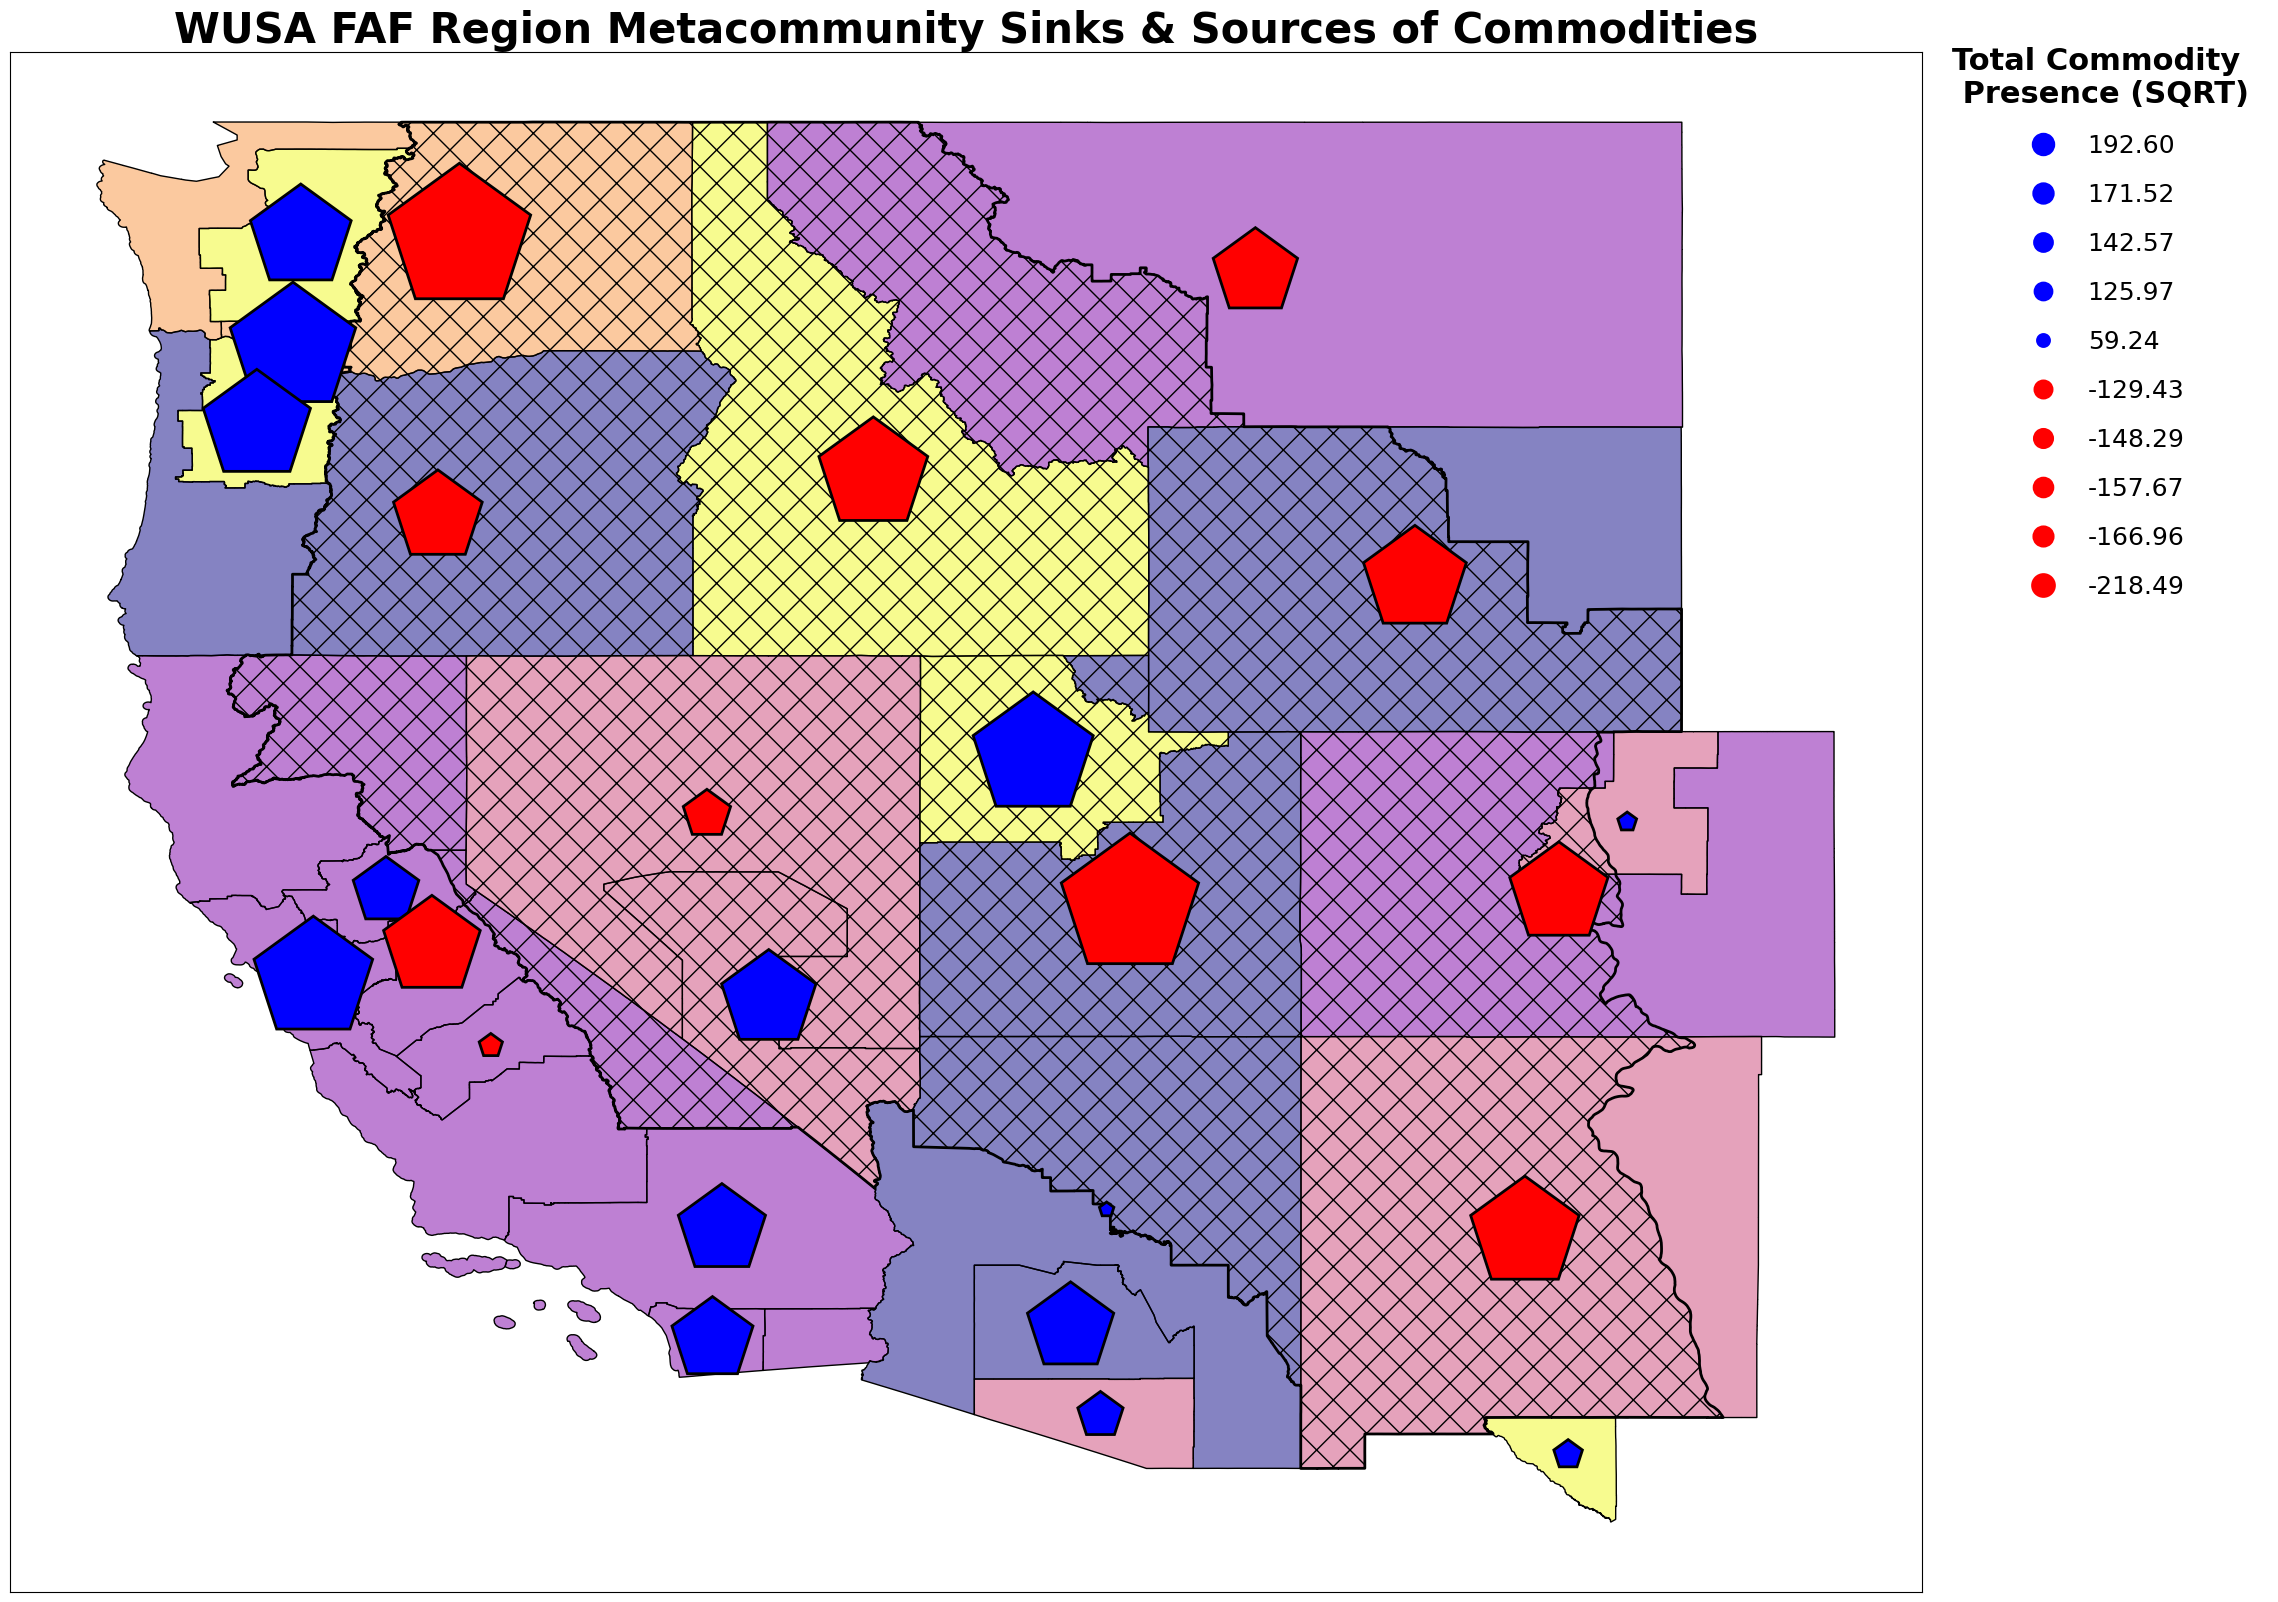

In [51]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import RegularPolygon, Patch
import pandas as pd

# Assuming IMW_META_PLOT_DF is your DataFrame with LAT and LON columns for node positions
# Replace with your actual DataFrame loading code
IMW_META_PLOT_DF['LAT'] = pd.to_numeric(IMW_META_PLOT_DF['LAT'], errors='coerce')
IMW_META_PLOT_DF['LON'] = pd.to_numeric(IMW_META_PLOT_DF['LON'], errors='coerce')

# update to your file path
gdf = gpd.read_file('FAF_IMW_Region_V2.shp', encoding='utf-8')
gdf = gdf.to_crs(epsg=4326)

# update to your file path
gdf2 = gpd.read_file('iw_boundary.shp', encoding='utf-8')
gdf2 = gdf2.to_crs(epsg=4326)

# Manually defined colors for each community
zone_colors = {
     # community 1
    '041': '#0d088780',
    '049': '#0d088780',
    '419': '#0d088780',
    '499': '#0d088780',
    '560': '#0d088780',
    
    # community 2
    '061': '#7e03a880',
    '062': '#7e03a880',
    '063': '#7e03a880',
    '064': '#7e03a880',
    '065': '#7e03a880',
    '069': '#7e03a880',
    '089': '#7e03a880',
    '300': '#7e03a880',
    
    # community 3
    '042': '#cc477880',
    '081': '#cc477880',
    '321': '#cc477880',
    '329': '#cc477880',
    '350': '#cc477880',

    # community 4
    '532': '#f8954080',
    '539': '#f8954080',

    # community 5
    '160': '#f0f92180',
    '411': '#f0f92180',
    '485': '#f0f92180',
    '491': '#f0f92180',
    '531': '#f0f92180'}

# Default color for any FAF_Zone not in the zone_colors dictionary
default_color = 'grey'

# Map the colors to the FAF_zone column in gdf
gdf['zone_color'] = gdf['FAF_Zone'].map(zone_colors).fillna(default_color)

# Function to scale pentagon size based on the square root of the presence value
def scale_pentagon_size(presence_value):
    base_size = 0.0045  # Base size for the pentagon
    scaled_size = base_size * np.sqrt(abs(presence_value))  # Scale size based on the square root of the presence value
    return max(scaled_size, 0.1)  # Ensure a minimum size

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(25, 20))

# Plot the FAF zones with the assigned colors
gdf.plot(ax=ax, color=gdf['zone_color'], edgecolor='k')

gdf2_color = 'black'  # Choose an appropriate color

# Step 2: Plot gdf2
gdf2.plot(ax=ax, edgecolor='black', facecolor='none', hatch='X', linewidth=2)

# Split the data into positive and negative groups
positive_df = IMW_META_PLOT_DF[IMW_META_PLOT_DF['Presence'] > 0]
negative_df = IMW_META_PLOT_DF[IMW_META_PLOT_DF['Presence'] < 0]

# Compute marker sizes
pos_marker_sizes = np.sqrt(positive_df['Presence'])
neg_marker_sizes = np.sqrt(np.abs(negative_df['Presence']))

# Plot the nodes
for index, row in IMW_META_PLOT_DF.iterrows():
    lat, lon = row['LAT'], row['LON']
    presence = row['Presence']
    color = 'blue' if presence > 0 else 'red'  # Green for positive, red for negative
    pentagon_size = scale_pentagon_size(presence)

    # Plot each node as a pentagon
    polygon = RegularPolygon((lon, lat), numVertices=5, facecolor=color, radius=pentagon_size,
                             edgecolor='black', linewidth=2, zorder=2)
    ax.add_patch(polygon)

# Calculate quantiles for the legend
quantiles_pos = [pos_marker_sizes.quantile(q) for q in [1, 0.8, 0.6, 0.4, 0.2]]
quantiles_neg = [neg_marker_sizes.quantile(q) for q in [0.2, 0.4, 0.6, 0.8, 1]]  # Reverse order for negative
legend_sizes = [np.sqrt(q) for q in quantiles_pos + quantiles_neg]  # Positive first, then negative
labels = [f'{q:.2f}' for q in quantiles_pos] + [f'-{q:.2f}' for q in quantiles_neg]  # Corresponding labels

# Create custom legend elements
legend_elements = [Line2D([0], [0], marker='o', color='w', label=lbl,
                          markersize=ls, markerfacecolor='blue' if i < len(quantiles_pos) else 'red',
                          markeredgewidth=3, markeredgecolor='blue' if i < len(quantiles_pos) else 'red',
                          linestyle='None') for i, (lbl, ls) in enumerate(zip(labels, legend_sizes))]

# Add custom legend to the plot
leg = ax.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1, 1.023),
                title="Total Commodity \n Presence (SQRT)", prop={'size': 18}, title_fontsize=22,
                labelspacing=1, borderpad=0.7)
leg.get_title().set_fontweight('bold')
leg.set_frame_on(False)

# Set aspect ratio, title, labels, and other plot settings
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])

plt.title("WUSA FAF Region Metacommunity Sinks & Sources of Commodities", fontsize=30, fontweight='bold')
plt.savefig("E&S_Figure3.png", dpi=1200, bbox_inches="tight")
plt.show()